<a href="https://colab.research.google.com/github/AdrianGabryla/MachineLearning/blob/main/02_pierwszy_projekt_uczenia_maszynowego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rozdział 2. Nasz pierwszy projekt uczenia maszynowego**

# Pozyskanie danych

*Witaj w korporacji Inteligentne Nieruchomości! Twoim zadaniem jest przewidywanie mediany wartości cen median w kalifornijskich dystryktach dla określonej liczby cech charakteryzujących te dystrykty.*

## Wczytajmy dane

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Zdefiniujmy domyślne rozmiary czcionek służące do generowania ładnych rysunków
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


housing = pd.read_csv("housing.csv")

## Zerknijmy na strukturę danych

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Każdy wiersz reprezentuje jeden dystrykt. Dostępnych jest 10 atrybutów: longitude , latitude , housing_median_age , total_rooms , total_bedrooms , population ,
households , median_income , median_house_value i ocean_proximity (w języku polskim są to, odpowiednio: Dł. geograficzna, Szer. geograficzna, Mediana wieku mieszkań, Całk. liczba pokoi, Całk. liczba
sypialni, Populacja, Rodziny, Mediana dochodów, Mediana cen mieszkań i Odległość do oceanu).

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Dzięki metodzie info() możemy się zapoznać z krótkim opisem danych, zwłaszcza z całkowitą
liczbą wierszy, typem każdego atrybutu oraz liczbą wartości niepustych (uwaga w polskim tłumaczeniu błąd "niezerowych").

Na zbiór danych składa się 20 640 przykładów, co oznacza, że jest on dość mały jak na standardy uczenia
maszynowego. Atrybut total_bedrooms zawiera zaledwie 20 433 wartości niezerowe, co oznacza, że cecha ta nie została zdefiniowana dla 207 dystryktów. Będziemy musieli zająć się tym później.

Z wyjątkiem ocean_proximity wszystkie pozostałe atrybuty mają wartości numeryczne. Typem wartości w cesze ocean_proximity jest object, co oznacza, że można tu przechowywać dowolny obiekt
języka Python. Skoro jednak wczytaliśmy dane z pliku CSV, to wiemy, że musi to być wartość tekstowa.
Najprawdopodobniej mamy tutaj do czynienia z atrybutem kategorialnym. Możemy sprawdzić, jakie kategorie są dostępne metodą value_counts()

In [4]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


Przyjrzyjmy się innym polom. Metoda describe() generuje podsumowanie atrybutów numerycznych.

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Wartości count (liczba), mean (średnia), std (odchylenie standardowe), min i max raczej nie wymagają wyjaśnienia. Wartości 25% , 50% i 75% ukazują odpowiadające im percentyle: percentyl wskazuje
wartość, poniżej której znajduje się określony odsetek obserwowanych przykładów. Przykładowo 25%
dystryktów ma wartość atrybutu housing_median_age mniejszą od 18, z kolei 50% próbek nie przekracza
wartości 29, a 75% procent nie osiągnęło wieku 37 lat. Parametry te są często nazywane, kolejno:
25. percentylem (lub pierwszym kwartylem), medianą oraz 75. percentylem (lub trzecim kwartylem).

Zwróćmy uwagę, że wartości puste są ignorowane (z tego powodu liczba elementów total_bedrooms wynosi tu 20433, a nie 20640).

Metoda `decribe` po prekazaniu odpowiednich argumentów zwraca satatystyki count (liczność), unique (liczba wartości unikalnych), top (najczęściej występującą wartość) oraz freq (ile razy występuje najczęstsza wartość).

In [6]:
housing.describe(include=object)

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


Kolejnym szybkim sposobem przyjrzenia się analizowanym danym jest wygenerowanie histogramu dla
każdego atrybutu numerycznego. Histogram przedstawia liczbę przykładów (w pionowej osi) znajdujących się w określonym przedziale wartości (oś pozioma). Można stworzyć histogram jednego atrybutu lub za pomocą metody hist() dokonać tego dla całego zbioru danych.

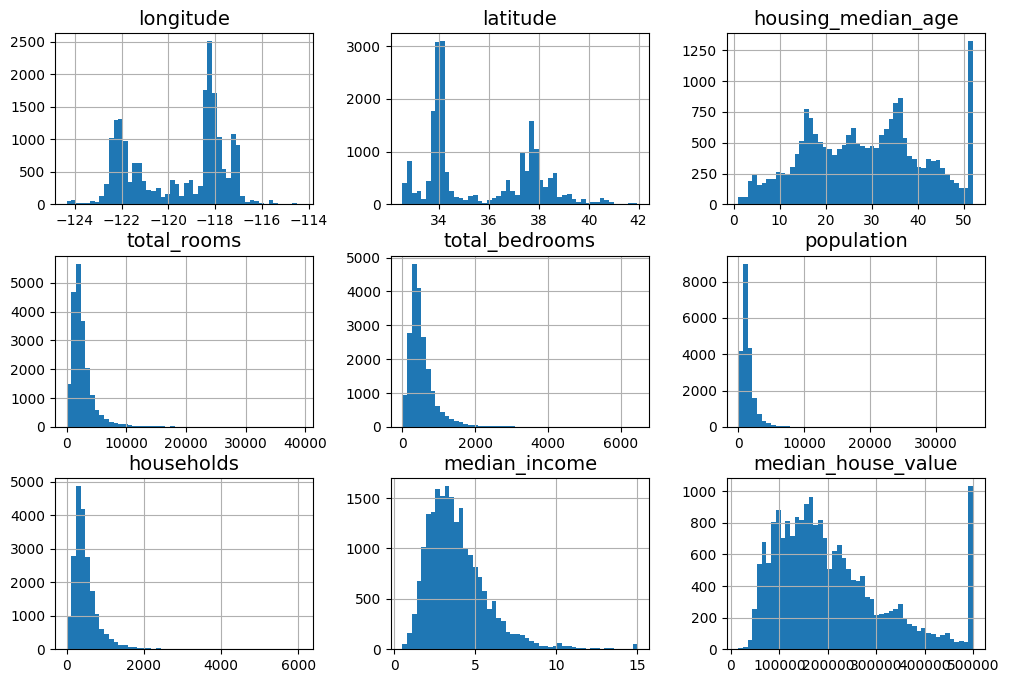

In [7]:
housing.hist(bins=50, figsize=(12, 8))
plt.show()

Możemy wyczytać z tych histogramów pewne informacje:
- atrybut mediany dochodów nie przypomina danych podawanych w dolarach
amerykańskich (USD). Dane te zostały przeskalowane i ograniczone do maksymalnej wartości 15 dla wyższej mediany dochodów oraz do minimalnej wartości 0,5 dla niższej mediany dochodów. Liczby reprezentują w przybliżeniu dziesiątki tysięcy dolarów (np. wartość 3 oznacza w rzeczywistości ok. 30 000 dolarów). Praca ze wstępnie przetworzonymi danymi stanowi normę w uczeniu maszynowym i niekoniecznie musi stanowić problem, należy jednak spróbować zrozumieć, jakim operacjom zostały one poddane.
- ograniczeniu uległy również wartości median wieku oraz cen mieszkań. Ta druga informacja
może nas szczególnie zmartwić, ponieważ stanowi ona nasz docelowy atrybut (etykietę). W takim wypadku należy skontaktować z zespołem klienckim (zespołem wykorzystującym uzyskane przez
nas wyniki) i dowiedzieć się, czy ograniczenie to będzie stanowiło problem. Jeżeli tak, tzn.
potrzebne są precyzyjne prognozy nawet powyżej wartości 500 000 dolarów, to pozostają
nam dwie możliwości:
    - uzyskać prawidłowe etykiety dla dystryktów mających obcięte górne wartości cen;
    - usunąć te dystrykty z zestawu uczącego (a także testowego, ponieważ system nie powinien
być karany, jeżeli będzie przewidywał wartości przekraczające 500 000 dolarów).
- Każdy z tych atrybutów jest ukazany w odmiennych skalach, nieraz znacznie zróżnicowanych.
Zajmiemy się tym zagadnieniem podczas omawiania skalowania cech.
- Wiele histogramów cechuje się prawoskośnością (ang. skewed right): rozciągają się one znacznie bardziej po prawej stronie mediany niż po lewej. Utrudnia to nieco niektórym algorytmom
uczenia maszynowego rozpoznawanie wzorców. Spróbujemy później przekształcić te atrybuty
w taki sposób, aby ich rozkład był bardziej symetryczny i dzwonowy

## Utwórzmy zbiór testowy

Moduł Scikit-Learn zawiera kilka różnych funkcji rozdzielających zbiory danych na wiele podzbiorów.
Najprostszą z nich jest train_test_split(), która zawiera kilka ciekawych funkcjonalności. Po pierwsze, mamy tu do czynienia z parametrem random_state, pozwalającym wybrać zarodek liczb losowych. Po drugie, możemy przekazywać wiele zbiorów danych mających taką samą liczbę wierszy — będą one rozdzielane pomiędzy takie same indeksy (jest to bardzo przydatne rozwiązanie, w przypadku gdy np. etykiety znajdują się w osobnym obiekcie DataFrame).

In [8]:
from sklearn.model_selection import train_test_split

Do tej pory rozważaliśmy metody całkowicie losowego próbkowania. Zazwyczaj takie rozwiązanie spisuje się dobrze w przypadku odpowiednio dużych zbiorów danych (zwłaszcza w odniesieniu do liczby atrybutów), bowiem w przeciwnym razie ryzykujemy wprowadzenie dużego obciążenia próbkowania. Gdy pracownicy urzędu statystycznego zamierzają przeprowadzić ankietę na tysiącu
osób, nie są one wybierane losowo z książki telefonicznej. Muszą zostać tak dobrane, aby stanowiły
reprezentatywny przykład całej populacji w kontekście zadawanych pytań. Przykładowo populacja
Stanów Zjednoczonych składa się w 51,1% z kobiet i 48,9% z mężczyzn, zatem prawidłowo przeprowadzona ankieta powinna uwzględniać te proporcje: 511 kobiet i 489 mężczyzn (przynajmniej wtedy, gdy odpowiedzi między obydwiema płciami mogą się w jakiś sposób różnić i atrybut płci wydaje się nam istotny). Jest to tzw. losowanie
warstwowe (ang. stratified sampling): populacja zostaje rozdzielona na jednorodne podgrupy zwane
warstwami (ang. strata, l. poj. stratum) i z każdej z nich jest dobierana odpowiednia liczba przykładów
zapewniająca prawidłowe odzwierciedlenie stanu populacji.

Załóżmy, że po rozmowie z pewnymi ekspertami okazuje się, że bardzo ważnym atrybutem pomagającym w prognozowaniu mediany cen mieszkań jest mediana dochodów. Możemy chcieć zagwarantować, żeby zbiór testowy wiernie reprezentował różne kategorie dochodów dla całego zbioru danych. Mediana dochodów stanowi atrybut ciągłych wartości numerycznych, dlatego najpierw należy stworzyć atrybuty kategorii dochodów.

In [9]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [10]:
housing["income_cat"].value_counts()

,count
income_cat,
3,7236
2,6581
4,3639
5,2362
1,822


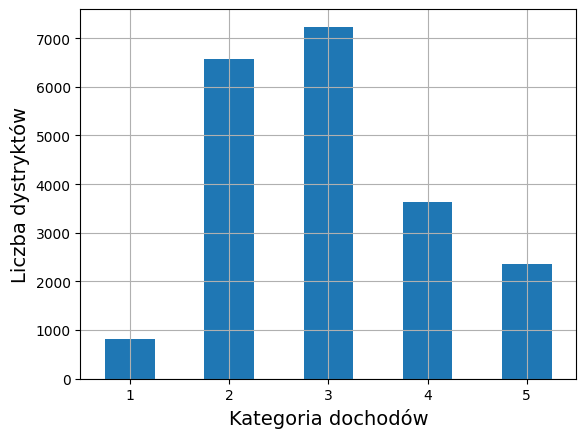

In [11]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Kategoria dochodów")
plt.ylabel("Liczba dystryktów")
plt.show()

Dokonajmy teraz podziału na zbiór treningowy w dwóch wariantach wykorzystując losowanie zwykłe i losowanie warstwowe.

In [12]:
df_train_rand_samp, df_test_rand_samp = train_test_split(
    housing, test_size=0.2, random_state=42)
df_train, df_test = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

Następnie stworzymy dataframe, aby porównać wyniki.

In [13]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

compare_samp = pd.DataFrame({
    "Łącznie (%)": income_cat_proportions(housing),
    "Warstwowe (%)": income_cat_proportions(df_test),
    "Losowe (%)": income_cat_proportions(df_test_rand_samp),
}).sort_index()
compare_samp.index.name = "Kategoria dochodów"
compare_samp["Błąd - warstwowe (%)"] = (compare_samp["Warstwowe (%)"] /
                                   compare_samp["Łącznie (%)"] - 1)
compare_samp["Błąd - losowe (%)"] = (compare_samp["Losowe (%)"] /
                                  compare_samp["Łącznie (%)"] - 1)
(compare_samp * 100).round(2)

,Łącznie (%),Warstwowe (%),Losowe (%),Błąd - warstwowe (%),Błąd - losowe (%)
Kategoria dochodów,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


Jak widać, zbiór testowy wygenerowany przy użyciu losowania warstwowego ma proporcje niemal identyczne jak uzyskane w pełnym zbiorze danych, podczas gdy wyniki uzyskane w całkowicie losowym zestawie danych znacznie odbiegają od tych uzyskanych w pełnym zbiorze danych.

Nie będziemy już korzystać ze zmiennej income_cat więc możemy ją usunąć.

In [14]:
for set_ in (df_train, df_test):
    set_.drop("income_cat", axis=1, inplace=True)

# Odkryj i zwizualizuj dane w celu zdobywania nowych informacji

Spróbujemy teraz lepiej poznać nasze dane. Najpierw należy się upewnić, że wszystkie wizualizacje i przekształcenia będziemy tworzyć na danych treningowych, aby uniknąć podglądania zbioru testowego. Ponieważ będziemy eksperymentować z różnymi przekształceniami pełnego zbioru uczącego, dlatego powinniśmy stworzyć kopię oryginału, aby wrócić do niego po zakończeniu pracy:

In [15]:
df_train_eda = df_train.copy()

## Wizualizacja danych graficznych

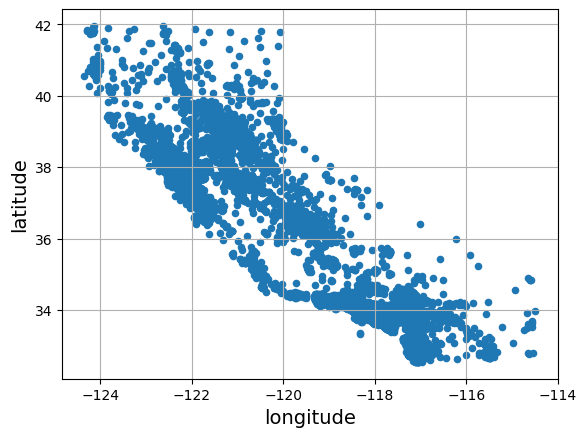

In [16]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

Kształt tego wykresu rzeczywiście przypomina Kalifornię, jednak poza tym trudno doszukać się jakiegokolwiek wzoru. Po wyznaczeniu wartości 0,2 parametru alpha będzie nam o wiele łatwiej zwizualizować miejsca, w których występuje duże zagęszczenie punktów danych

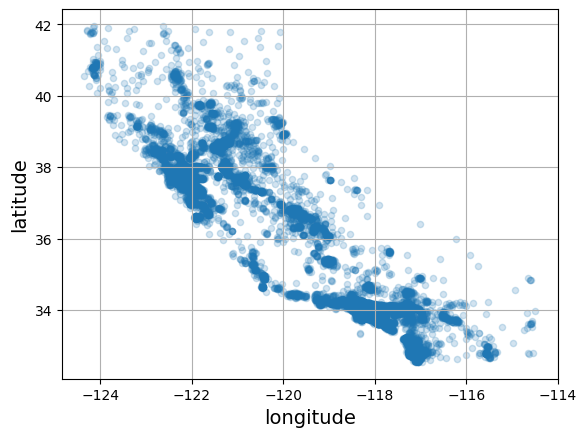

In [17]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

Wprowadźmy teraz jeszcze więcej dodatkowych argumentów:
- wielkość widocznego kółka symbolizuje populację dystryktu (argument s),
- ceny mieszkań (argument c),
- domyślna mapa kolorów (argument cmap) o nazwie jet

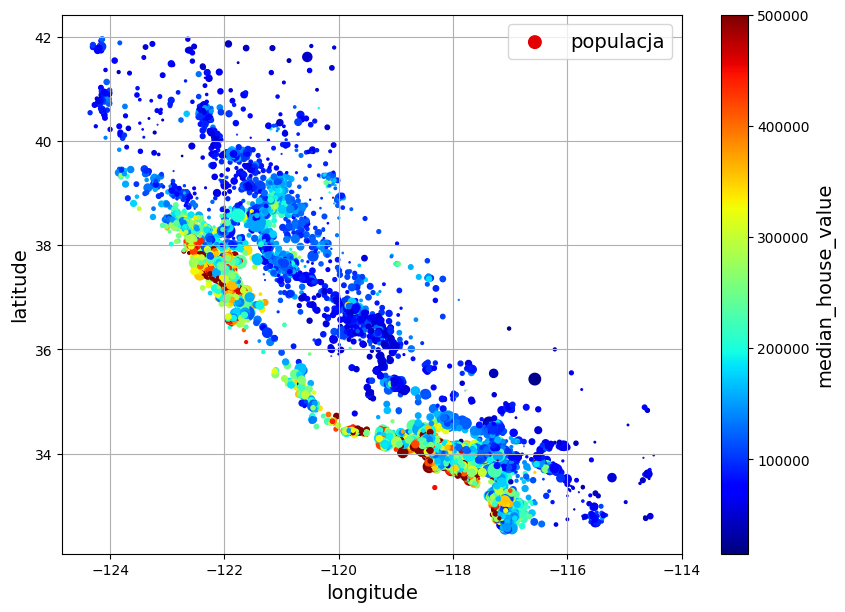

In [18]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=df_train_eda["population"] / 100, label="populacja",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

Argument `sharex=False` naprawia błąd wyświetlania: bez niego nie są wyświetlane wartości osi x i etykiety (zob. https://github.com/pandas-dev/pandas/issues/10611).

Możemy dodać mapę kaliforni jako podkład żeby nasz rysunek wyglądał jeszcze lepiej.

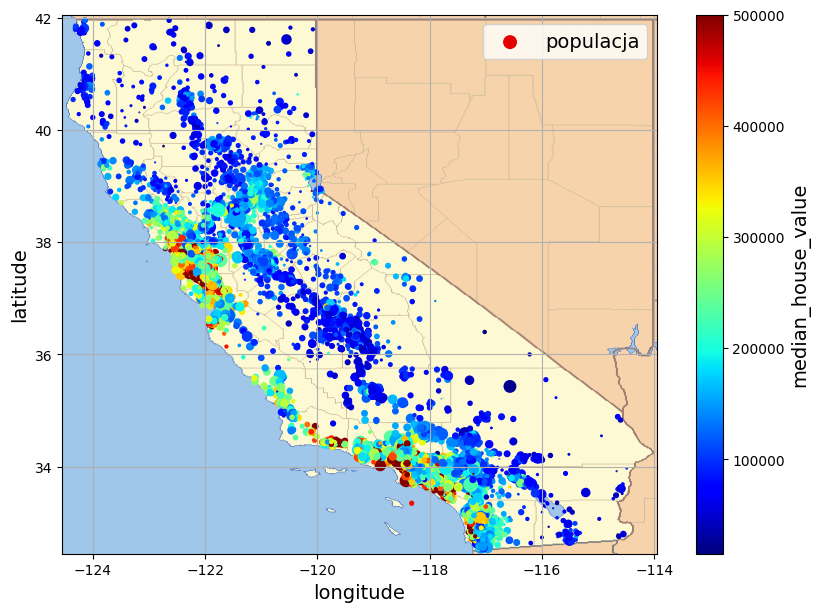

In [20]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=df_train_eda["population"] / 100, label="populacja",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
california_img = plt.imread("california.png")
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)
plt.show()

## Wyszukiwanie korelacji

Możemy z łatwością wyliczyć współczynnik korelacji
liniowej (zwany również współczynnikiem korelacji Pearsona) pomiędzy każdą parą wartości za
pomocą metody corr():

In [21]:
corr_matrix = df_train_eda.select_dtypes(np.number).corr()

In [22]:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
longitude,-0.050859
latitude,-0.139584


Innym sposobem sprawdzenia korelacji pomiędzy atrybutami jest użycie funkcji scatter_matrix
stanowiącej część modułu Pandas; generuje ona wykres każdego atrybutu numerycznego wobec
pozostałych atrybutów numerycznych. Obecnie mamy do dyspozycji 11 atrybutów numerycznych, dlatego uzyskalibyśmy w sumie $11^2 = 121$ wykresów, które łącznie nie zmieściłyby się na jednej stronie,
dlatego wybieramy kilka najbardziej obiecujących atrybutów, które wydają się skorelowane w największym stopniu z medianą cen mieszkań

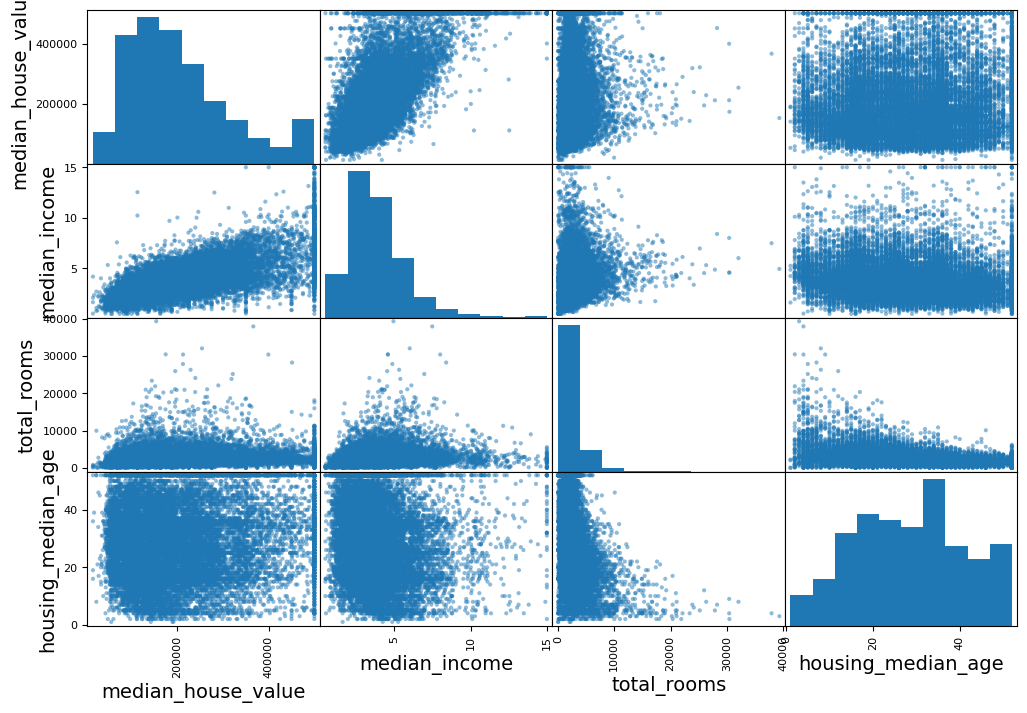

In [23]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(df_train_eda[attributes], figsize=(12, 8))
plt.show()

Główna przekątna byłaby wypełniona prostymi, gdyby moduł Pandas tworzył wykresy każdej zmiennej
wobec samej siebie, co nie byłoby zbyt przydatne. Dlatego zamiast tego widzimy histogram każdego
atrybutu.

Jeśli spojrzymy na wykresy korelacji, to można uznać, że najbardziej obiecującym atrybutem służą-
cym do prognozowania mediany cen mieszkań jest mediana dochodów, dlatego przyglądamy się uważniej ich wykresowi korelacji

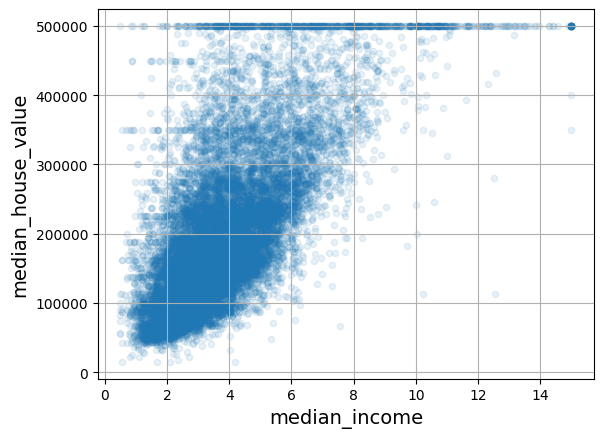

In [24]:
df_train_eda.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.show()

Z tego wykresu dowiadujemy się kilku rzeczy. Po pierwsze, korelacja pomiędzy tymi atrybutami jest
całkiem silna; możemy bez trudu dostrzec tendencję wzrostową, a poszczególne punkty znajdują się
dość blisko siebie. Po drugie, wspomniane już ograniczenie ceny jest wyraźnie widoczne jako pozioma
linia w punkcie 500 000 dolarów. Możemy jednak zauważyć mniej oczywiste proste: poziomą w punkcie
450 000 dolarów, kolejną w okolicy 350 000 dolarów, być może jeszcze jedną mniej więcej w punkcie
280 000 dolarów, a pod nią kilka innych. Warto byłoby spróbować usunąć z danych odpowiedzialne za
to dystrykty, aby uniemożliwić algorytmom naukę odtwarzania takich dziwactw

## Eksperymentowanie z łączeniem atrybutów

Jedną z rzeczy, jakie należałoby wykonać przed przygotowaniem danych do użytku algorytmów
uczenia maszynowego, jest wypróbowanie różnych kombinacji atrybutów. Przykładowo całkowita
liczba pomieszczeń w dystrykcie nie jest zbyt wartościowym atrybutem, jeśli nie znamy liczby przebywających tam rodzin. W rzeczywistości interesuje nas liczba pokojów przypadających na rodzinę.
Również całkowita liczba sypialni sama w sobie nic nam nie mówi: prawdopodobnie należałoby ją
porównać z całkowitą liczbą pomieszczeń. Inną ciekawą kombinacją atrybutów jest określenie zależności pomiędzy populacją a liczbą rodzin. Tworzymy te nowe atrybuty w następujący sposób:

In [25]:
df_train_eda["pokoje_na_rodzinę"] = df_train_eda["total_rooms"] / df_train_eda["households"]
df_train_eda["współczynnik_sypialni"] = df_train_eda["total_bedrooms"] / df_train_eda["total_rooms"]
df_train_eda["liczba_osób_na_dom"] = df_train_eda["population"] / df_train_eda["households"]

i jeszcze raz liczymy korelacje

In [26]:
corr_matrix = df_train_eda.select_dtypes(np.number).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
pokoje_na_rodzinę,0.143663
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
liczba_osób_na_dom,-0.038224
longitude,-0.050859


Nowy atrybut współczynnik_sypialni jest znacznie bardziej skorelowany z medianą
cen mieszkań niż całkowita liczba pomieszczeń lub sypialni. Liczba pokojów przypadająca
na rodzinę również dostarcza nam więcej informacji niż całkowita liczba pomieszczeń w dystrykcie —
jest dość oczywiste, że wraz z powierzchnią domu rośnie jego cena.

# Przygotujmy dane dla algorytmów uczenia maszynowego

Wróćmy do pierwotnego zbioru uczącego i oddzielmy zmienną docelową (zwróć uwagę, że metoda `df_train.drop()` tworzy kopię `df_train` pozbawioną kolumny i w rzeczywistości nie modyfikuje samego zbioru `df_train`, chyba że przekażesz parametr `inplace=True`):

In [27]:
X_train = df_train.drop("median_house_value", axis=1)
y_train = df_train["median_house_value"].copy()

## Oczyszczanie danych

Wiemy już z metody info, że wartości brakujące znajdują się tylko w kolumnie "total_bedrooms", ale możemy to sprawdzić również w inny sposób:

In [28]:
df_train.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,168
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


Co istotne nie mamy wartości brakujących w kolumnie median_house_value, czyli w kolumnie, którą chcemy przewidywać.

W książce opisano trzy techniki radzenia sobie z wartościami NaN:
1. pozbyć się dystryktów zawierających brakujące dane;
2. pozbyć się całego atrybutu;
3. uzupełnić brakujące dane określoną wartością (zero, średnia, mediana itd.). Jest to tak zwana
**imputacja (ang. imputation)**.
i odpowiadające im metody w Pythonie
```python
X_train.dropna(subset=["total_bedrooms"], inplace=True)    # rozwiązanie 1

X_train.drop("total_bedrooms", axis=1)       # rozwiązanie 2

median = X_train["total_bedrooms"].median()  # rozwiązanie 3
X_train["total_bedrooms"].fillna(median, inplace=True)
```

W każdym przypadku stworzymy kopię zestawu danych `X_train` i będziemy na niej pracować, aby uniknąć uszkodzenia oryginału. Zaprezentujemy także wynik każdej opcji. Na początek przefiltrujemy wiersze, w których pierwotnie znajdowała się wartość NaN.

In [29]:
null_rows_idx = X_train.isnull().any(axis=1)
X_train.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


In [30]:
X_train_option1 = X_train.copy()

X_train_option1.dropna(subset=["total_bedrooms"], inplace=True)  # rozwiązanie 1.

X_train_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


Po zastosowaniu rozwiązania 1 usunięte zostają wiersze zawierające wartości NaN w kolumnie total_bedrooms i ta kolumna wciąż pozostaje w zbiorze uczącym.

In [31]:
X_train_option2 = X_train.copy()

X_train_option2.drop("total_bedrooms", axis=1, inplace=True)  # rozwiązanie 2.

X_train_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,375.0,183.0,9.8020,<1H OCEAN


Drugie rozwiązanie nie usuwa wierszy, w których były wartości NaN w kolumnie total_bedrooms. Po prostu usuwamy tutaj całą kolumnę total_bedrooms co załatwia sprawę wartości brakujących w tej kolumnie.

In [32]:
X_train_option3 = X_train.copy()

median = X_train["total_bedrooms"].median()
X_train_option3["total_bedrooms"].fillna(median, inplace=True)  # rozwiązanie 3.

X_train_option3.loc[null_rows_idx].head()

/tmp/ipython-input-2078823219.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_option3["total_bedrooms"].fillna(median, inplace=True)  # rozwiązanie 3.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020,<1H OCEAN


W trzecim rozwiązaniu nie usuwamy ani wierszy ani kolumny, ale zamiast tego wypełniamy wartości brakujące medianą kolumny total_bedrooms co ważne obliczoną na podstawie zbioru treningowego, a nie całego zbioru (żeby uniknąć podglądania zbioru testowego).

Wybieramy trzecie rozwiązanie, ponieważ jest najmniej destrukcyjne i najpowszechniej stosowane, jednak zamiast powyższego
kodu skorzystamy z przydatnej klasy SimpleImputer stanowiącej część biblioteki Scikit-Learn. Dużą
zaletą jest możliwość przechowywania wartości mediany każdej cechy: dzięki temu możliwe będzie
wstawianie brakujących wartości nie tylko w zbiorze uczącym, ale także walidacyjnym, testowym
oraz we wszelkich nowych danych wprowadzanych do modelu. Żeby z niej skorzystać, musisz najpierw
stworzyć wystąpienie klasy SimpleImputer , w którym zaznaczamy, że chcemy zastąpić brakujące wartości każdego atrybutu medianą tego atrybutu.

In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Oddzielamy atrybuty numeryczne, aby móc skorzystać ze strategii `"median"` (gdyż nie można jej obliczać na atrybutach tekstowych, takich jak `ocean_proximity`):

In [34]:
X_train_num = X_train.select_dtypes(include=[np.number])

Możemy teraz dopasować wystąpienie klasy Imputer do danych uczących za pomocą metody fit():

In [35]:
imputer.fit(X_train_num)

SimpleImputer(strategy='median')

Klasa imputer po prostu obliczyła medianę atrybutu i zachowała wyniki w atrybucie `statistics_`.
Jedynie w atrybucie total_bedrooms brakuje niektórych wartości, nie wiesz jednak, czy po uruchomieniu ostatecznej wersji systemu będą dostępne wszystkie wartości w nowych zestawach danych, dlatego najbezpieczniejszym rozwiązaniem jest zastosowanie klasy imputer wobec wszystkich atrybutów
numerycznych:

In [36]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

Sprawdźmy, że wynik ten jest taki sam, jak ręczne obliczenie mediany każdego atrybutu:

In [37]:
X_train_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

Możesz teraz wykorzystać tak „wytrenowaną” klasę imputer do przekształcenia zbioru uczącego,
zastępując brakujące wartości obliczonymi medianami:

In [38]:
X = imputer.transform(X_train_num)

Można również zastąpić brakujące wartości wartością średnią ( strategy="mean" ) lub najczęściej
występującą wartością ( strategy="most_frequent" ) albo wartością stałą ( strategy="constant",
fill_value=… ). Dwie ostatnie strategie obsługują wartości nienumeryczne.

> Istnieją jeszcze bardziej zaawansowane imputery w pakiecie sklearn.impute takie jak KNNImputer, który zastępuje każdą brakującą wartość średnią z wartości k-najbliższych
sąsiadów dla tej cechy. Odległość jest obliczana na podstawie wszystkich dostępnych cech.

Transformatory Scikit-Learn dają na wyjściu tablice NumPy (a czasami macierze rzadkie SciPy)
nawet wtedy, gdy na wejściu są im dostarczane obiekty DataFrame modułu Pandas. Dlatego wynikiem funkcji imputer.transform(X_train_num) jest tablica NumPy: X nie zawiera nazw kolumn ani
indeksu.

In [39]:
X

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]])

Na szczęście nie jest trudno umieścić X w obiekcie DataFrame i odzyskać nazwy kolumn oraz indeks:

In [40]:
X_train_tr = pd.DataFrame(X, columns=X_train_num.columns,
                          index=X_train_num.index)
X_train_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


Widzimy poniżej, że w wiersze, w których uprzednio mieliśmy wartość NaN w kolumnie total_bedrooms zostały uzupełnione przez medianę równą 434.

In [41]:
X_train_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


O ile w przypadku prostych transformatorów łatwo wstawić odpowiednie kolumny do dataframe, to w przypadku tych bardziej skomplikowanych może być to trudne. Na szczęście od 17 października 2022 i wersji 1.2 sklearn obsługuje Pandas DataFrames jako output dla swoich transformerów. Wystarczy to skonfigurować na poziomie konkretnego transformera, pipeline np.
```python
# for transformer
scaler = StandardScaler().set_output(transform="pandas")
# for pipeline
clf = make_pipeline(
    StandardScaler(), SelectPercentile(percentile=75), LogisticRegression()
)
clf.set_output(transform="pandas")
```
lub globalnie jak poniżej:
```python
from sklearn import set_config
set_config(transform_output="pandas")
```

In [42]:
# Pandas output dla transformera SimpleImputer
# Jeśli to nie działa to wersja pakietu scikit-learn jest za stara. Minimalna wymagana to 1.2
imputer = SimpleImputer(strategy="median").set_output(transform="pandas")
X = imputer.fit_transform(X_train_num)

Po ustawieniu tej opcji widzimy, że output transformatora to Pandas DataFrame

In [43]:
X = imputer.transform(X_train_num)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


i że wartości brakujące zostały uzupełnione w odpowiednich miejscach.

In [44]:
X.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


## Konstrukcja modułu Scikit-Learn

Moduł Sci-kit-Learn wyróżnia się wyjątkowo dobrze przemyślaną konstrukcją. Oto główne założenia projektowe:
- **Jednolitość** - wszystkie obiekty korzystają z jednolitego, prostego interfejsu
    - **Estymatory (funkcje oszacowujące)**. Każdy obiekt zdolny do szacowania pewnych parametrów na podstawie zbioru danych jest zwany estymatorem (np. klasa *SimpleImputer* jest funkcją
oszacowującą). Sama operacja szacowania jest wykonywana przez metodę `fit()` , zaś jej parametrem jest zbiór danych lub dwa zestawy danych w przypadku algorytmów uczenia nadzorowanego; drugi zbiór zawiera etykiety. Wszelkie inne parametry wpływające na przebieg operacji szacowania są uznawane za hiperparametry (np. parametr *strategy* klasy *SimpleImputer*) — muszą
być one wyznaczane jako zmienne wystąpienia (generalnie w postaci parametru konstruktora).
    - **Transformatory (funkcje transformujące lub przekształcające)**. Niektóre estymatory (jak na
przykład klasa *SimpleImputer*) są w stanie również przekształcać zbiór danych; są one zwane **transformatorami**. Także w tym przypadku ich interfejs nie jest skomplikowany: proces transformacji jest przeprowadzany za pomocą metody `transform()`, a jego parametr stanowi modyfikowany zbiór danych. W rezultacie zostaje zwrócony przekształcony zbiór danych. Operacja
transformacji zależy przede wszystkim od wyuczonych parametrów (tak jak w przypadku klasy SimpleImputer). Wszystkie transformatory zawierają również metodę złożoną `fit_transform()`, która jest równoznaczna z wywołaniem metody fit(), a po niej transform() (czasami jednak ta metoda złożona jest zoptymalizowana i działa znacznie szybciej od jej elementów składowych).
    - **Predyktory (funkcje prognostyczne)**. Pewne estymatory są w stanie przewidywać wyniki na
podstawie zbioru danych; są to tak zwane **predyktory**. Na przykład model *LinearRegression* z poprzedniego rozdziału stanowi predyktor: przewidzieliśmy za jego pomocą satysfakcję z życia, znając wartość PKB per capita danego kraju. Funkcja prognostyczna zawiera metodę `predict()` przyjmującą nowe zbiory danych i zwracającą zestaw powiązanych z nimi prognoz. Dodatkowo występuje tu także metoda `score()`, mierząca jakość prognoz na podstawie zbioru testowego (oraz
powiązanych etykiet w przypadku algorytmów uczenia nadzorowanego).
- **Inspekcja** - wszystkie hiperparametry estymatorów są bezpośrednio dostępne poprzez publiczne
zmienne wystąpień (np. *imputer.strategy*); wszystkie wyuczone parametry funkcji oszacowującej są
dostępne poprzez tego typu zmienne oznaczone na końcu podkreślnikiem (np. *imputer.statistics_*).
- **Nierozprzestrzenianie klas**. Zbiory danych nie są reprezentowane w postaci własnoręcznie przygotowanych klas, lecz jako macierze NumPy lub macierze rzadkie SciPy. Z kolei hiperparametry to standardowe ciągi znaków lub wartości liczbowe języka Python.
- **Kompozycja**. Istniejące elementy składowe są używane tak często, jak to możliwe. Przykładowo
łatwo stworzyć estymator *Pipeline* z samodzielnie dobranej sekwencji funkcji transformujących zakończonych ostatnią funkcją oszacowującą.
- **Rozsądne wartości domyślne**. Moduł Scikit-Learn zawiera przemyślane wartości domyślne dla
większości parametrów, dzięki czemu możemy z łatwością tworzyć bazowy system roboczy.

## Przetwarzanie atrybutów tekstowych i kategorialnych

Przetwórzmy teraz wstępnie cechę kategorialną `ocean_proximity`:

In [45]:
X_train_cat = X_train[["ocean_proximity"]]
X_train_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


Z metody `value_counts()`, której użyliśmy wcześniej, wiemy, że nie jest to typowy tekst: istnieje tu ograniczona liczba wartości, z których każda reprezentuje atrybut
kategorialny. Większość algorytmów uczenia maszynowego lepiej sobie radzi z liczbami, przekształćmy
więc te kategorie z tekstu na wartości numeryczne. Możemy w tym celu użyć klasy OrdinalEncoder:

In [46]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder().set_output(transform="pandas")
X_train_cat_encoded = ordinal_encoder.fit_transform(X_train_cat)

In [47]:
X_train_cat_encoded.head()

,ocean_proximity
13096,3.0
14973,0.0
3785,1.0
14689,1.0
20507,4.0


Możemy uzyskać listę kategorii za pomocą wystąpienia atrybutu `categories_`. Jest to lista zawierająca
jednowymiarową tablicę kategorii dla każdego atrybutu kategorialnego (w tym przypadku mamy do czynienia z listą zawierającą jedną tablicę, ponieważ dysponujemy jednym atrybutem kategorialnym):

In [48]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Istnieje pewien problem z tym rozwiązaniem: algorytmy uczenia maszynowego będą uznawały, że
dwie zbliżone wartości będą bardziej do siebie podobne niż do dalszych wartości. W pewnych przypadkach nie stanowi to problemu (np. przy uporządkowanych kategoriach, takich jak „zły”, „przeciętny”, „dobry” i „znakomity”), ale oczywiście nie dotyczy to kolumny ocean_proximity (np. kategorie 0 i 4 są wyraźnie bardziej do siebie podobne niż 0 i 1). Powszechnie stosowanym rozwiązaniem jest stworzenie jednego binarnego atrybutu dla każdej kategorii, czyli tak zwane **kodowanie „gorącojedynkowe” (ang. one-hot encoding)**. Nowe atrybuty są czasami nazywane **atrybutami sztucznymi (ang. dummy attributes)**. Moduł Scikit-Learn zawiera koder *OneHotEncoder*, konwertujący kategorialne wartości całkowite na wektory „gorącojedynkowe”:

In [49]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder_default = OneHotEncoder().set_output(transform="default") # Pandas output does not support sparse data. Set sparse_output=False to output pandas DataFrames or disable pandas output via `ohe.set_output(transform="default")
X_train_cat_1hot_default = cat_encoder_default.fit_transform(X_train_cat)
X_train_cat_1hot_default

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

Domyślnie klasa `OneHotEncoder` zwraca macierz rzadką, ale w razie potrzeby możemy przekształcić ją w macierz gęstą wywołując metodę `toarray()`:

Macierz rzadka jest bardzo skutecznym odwzorowaniem macierzy zawierających głównie zera. W istocie
przechowywane są w niej jedynie wartości niezerowe oraz informacje o ich położeniu. Macierz rzadka pozwala
zaoszczędzić mnóstwo pamięci i przyspieszyć obliczenia.

In [50]:
X_train_cat_1hot_default.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

Ewentualnie możesz wyznaczyć `sparse_output=False` podczas tworzenia klasy `OneHotEncoder` i wtedy metoda `transform()` bezpośrednio zwróci zwykłą (gęstą) macierz (ze względu na nasze ustawienie *set_output* będzie to Pandas DataFrame, bez tych ustawień byłaby to klasyczna tablica NumPy):

In [51]:
# Since sklearn version 1.2 sparse was renamed to sparse_output
cat_encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
X_train_cat_1hot_df = cat_encoder.fit_transform(X_train_cat)
X_train_cat_1hot_df

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0.0,0.0,0.0,1.0,0.0
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
14207,1.0,0.0,0.0,0.0,0.0
13105,0.0,1.0,0.0,0.0,0.0
19301,0.0,0.0,0.0,0.0,1.0
19121,1.0,0.0,0.0,0.0,0.0


Podobnie jak w przypadku klasy OrdinalEncoder, możemy uzyskać listę kategorii za pomocą wystąpienia atrybutu `categories_` kodera:

In [52]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Biblioteka Pandas zawiera funkcję `get_dummies()`, która również przekształca każdą cechę kategorialną w odwzorowanie „gorącojedynkowe” zawierające po jednej cesze binarnej na kategorię. Przyjrzyjmy się temu na podstawie przykładowego zbioru:

In [53]:
sample_df = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(sample_df)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


Wygląda to całkiem ładne i prosto, dlaczego więc nie użyć tego rozwiązania zamiast klasy OneHotEncoder?
Zaletą klasy OneHotEncoder jest to, że zapamiętuje ona kategorie, na których została wytrenowana.
Jest to bardzo ważne, ponieważ gdy Twój model znajdzie się w środowisku produkcyjnym, powinien otrzymywać dokładnie takie same cechy jak w fazie uczenia: nie należy żadnej dodawać ani pomijać.
Zobaczmy, jakie wyniki generuje nasz wytrenowany cat_encoder , gdy spróbujemy przekształcić ten sam przykładowy zbiór (za pomocą metody `transform()` , a nie `fit_transform()`):

In [54]:
cat_encoder.transform(sample_df)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0


Metoda `get_dummies()` dostrzegła tylko dwie kategorie, dlatego umieszcza na wyjściu
dwie kolumny, natomiast klasa *OneHotEncoder* daje po jednej kolumnie na każdą wyuczoną kategorię,
we właściwej kolejności. Do tego jeśli dostarczysz metodzie `get_dummies()` obiekt DataFrame zawierający
nieznaną kategorię (np. "<2H OCEAN"), to radośnie wygeneruje dla niej kolumnę:

In [55]:
sample_unknown_df = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(sample_unknown_df)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


Jednak klasa *OneHotEncoder* jest „mądrzejsza”: wykryje nieznaną kategorię i spowoduje wyświetlenie komunikatu o wyjątku. Jeżeli chcesz, możesz wyznaczyć wartość `"ignore"` hiperparametru `handle_unknown` , co sprawi, że nieznana kategoria będzie oznaczana jako 0:

In [56]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(sample_unknown_df)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


> Jeżeli atrybut kategorialny zawiera znaczną liczbę kategorii (np. kod kraju, zawód,
gatunek), to w wyniku kodowania „gorącojedynkowego” będziemy otrzymywać
znaczną liczbę cech wejściowych. Może to spowolnić proces uczenia i zmniejszyć
skuteczność. W takim przypadku warto zastąpić wejściowe dane kategorialne przy-
datnymi cechami numerycznymi powiązanymi z kategoriami, np. możesz zastąpić cechę
ocean_proximity odległością do oceanu. Ewentualnie możemy wykorzystać
jeden z koderów umieszczonych w pakiecie category_encoders dostępnym w serwisie
GitHub (https://github.com/scikit-learn-contrib/category_encoders). Jeśli zaś modelujemy
sieci neuronowe, możemy zamiast każdej kategorii wprowadzić poznawalny, mało-
wymiarowy wektor zwany **wektorem właściwościowym (ang. embedding)**. Jest to przykład **uczenia się reprezentacji (ang.representation learning)** (omówionego w kolejnych rozdziałach).

Podczas dopasowywania dowolnego estymatora Scikit-Learn za pomocą obiektu DataFrame estymator przechowuje nazwy kolumn w atrybucie `feature_names_in_`. Biblioteka Scikit-Learn sprawia następnie, że każdy następny obiekt DataFrame dostarczany do tego estymatora (np. do metody transform() czy predict()) zawiera te same nazwy kolumn.

In [57]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

Transformatory zawierają także metodę `get_feature_names_out()`, której możesz użyć do stworzenia obiektu DataFrame na podstawie rezultatu tego transformatora:

In [58]:
cat_encoder_default.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [59]:
df_output = pd.DataFrame(X_train_cat_1hot_default.toarray(), # Konwersja macierzy rzadkiej do gęstej
    columns=cat_encoder_default.get_feature_names_out(), # Użycie wyjściowych nazw kolumn z transformatora
    index=X_train_cat.index # Użycie index DataFame przekazanego do metody fit_transform transformatora
)

In [60]:
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0.0,0.0,0.0,1.0,0.0
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
14207,1.0,0.0,0.0,0.0,0.0
13105,0.0,1.0,0.0,0.0,0.0
19301,0.0,0.0,0.0,0.0,1.0
19121,1.0,0.0,0.0,0.0,0.0


## Skalowanie cech

Wywołajmy metodę `describe`, aby przyjrzeć się naszym zmiennym numerycznym. Mają one różne zakresy oraz różne wartości średniej oraz mediany. Dlatego dane te należy przeskalować.

In [61]:
X_train_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000
mean,-119.573125,35.637746,28.577156,2639.402798,538.949094,1425.513929,499.990189,3.870428
std,2.000624,2.133294,12.585738,2185.287466,423.862079,1094.795467,382.865787,1.891936
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.000000,296.000000,787.000000,279.000000,2.562500
50%,-118.510000,34.260000,29.000000,2125.000000,434.000000,1167.000000,408.000000,3.538500
75%,-118.010000,37.720000,37.000000,3154.000000,645.000000,1726.000000,603.000000,4.750000
max,-114.490000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100


Jednym z najważniejszych przekształceń dokonywanych na danych jest **skalowanie cech (ang. feature
scaling)**. Większość algorytmów uczenia maszynowego słabo sobie radzi z atrybutami numerycznymi
znajdującymi się w różnych zakresach skali. Dotyczy to również naszego zbioru danych: całkowita
liczba pomieszczeń mieści się w zakresie od 6 do 39 320, z kolei wartości mediany dochodów to zakres
zaledwie od 0 do 15. Bez skalowania większość modeli będzie faworyzowała ignorowanie mediany
dochodów i koncentrowała się bardziej na liczbie pomieszczeń.

Istnieją dwa popularne rodzaje skalowania wszystkich atrybutów do jednego poziomu: **skalowanie
min. – max. (ang. min-max scaling)** i **standaryzacja (ang. standarization)**.

> Podobnie jak w przypadku wszystkich estymatorów, **należy dostosować funkcje skalujące
wyłącznie do danych uczących**: nigdy nie używaj metod *fit()* lub *fit_transform()*
do innych zbiorów danych. Dopiero po wyuczeniu klasy skalującej możesz użyć metody
transform() do przekształcenia dowolnego innego typu zbioru danych, w tym zbioru
walidacyjnego, zbioru testowego oraz nowych danych. Zwróć uwagę, że chociaż wartości
zestawu uczącego będą zawsze skalowane do określonego zakresu, to jeżeli nowe dane
będą zawierać jakieś elementy odstające, to mogą one wylądować poza skalą. Jeżeli
chcesz tego uniknąć, wyznacz wartość True hiperparametru *clip*.

Skalowanie min. – max. (zwane przez wiele osób **normalizacją**) jest najprostszym procesem: dla
każdego atrybutu wartości są tak przesuwane i skalowane, że mieszczą się w zakresie pomiędzy 0 i 1.
Osiąga się to, odejmując od danej wartości wartość minimalną i dzieląc otrzymany wynik przez różnicę
między wartością maksymalną i minimalną. W module Scikit-Learn służy do tego funkcja transformująca `MinMaxScaler`. Zawiera ona hiperparametr `feature_range` , pozwalający zmieniać zakres skali, jeśli
z jakiegoś powodu nie odpowiada Ci domyślny zakres 0 – 1 (np. sieci neuronowe działają najlepiej
z danymi o średniej wynoszącej zero, dlatego preferowany jest zakres od −1 do 1).

In [62]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1)).set_output(transform="pandas")
X_train_num_min_max_scaled = min_max_scaler.fit_transform(X_train_num)

Widać, że po skalowaniu wszystkie zmienne mają wartości z przedziału -1 do 1 (średnie i odchylenia standardowe są różne dla poszczególnych zmiennych):

In [63]:
X_train_num_min_max_scaled.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000
mean,-0.031060,-0.343033,0.081457,-0.865842,-0.826720,-0.825480,-0.813705,-0.535106
std,0.405806,0.453892,0.493558,0.111160,0.136532,0.134314,0.142940,0.260953
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.482759,-0.706383,-0.333333,-0.926497,-0.904977,-0.903815,-0.896211,-0.715507
50%,0.184584,-0.636170,0.098039,-0.892009,-0.860525,-0.857195,-0.848049,-0.580889
75%,0.286004,0.100000,0.411765,-0.839666,-0.792559,-0.788615,-0.775247,-0.413787
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Mechanizm standaryzacji jest odmienny: najpierw od danej wartości jest odejmowana średnia (czyli
średnia w standaryzowanych próbkach zawsze wynosi 0), a następnie wynik jest dzielony przez odchylenie standardowe (dzięki czemu odchylenie standardowe wartości standaryzowanych jest równe 1).
W przeciwieństwie do skalowania min. – max. standaryzacja nie ogranicza skalowanych wartości do określonego zakresu. Z drugiej strony standaryzacja jest znacznie mniej wrażliwa na elementy odstające.
Załóżmy na przykład, że przez pomyłkę mediana dochodów dla danego dystryktu jest równa 100
zamiast standardowego przedziału 0 – 15. Skalowanie metodą min. – max. do zakresu od 0 do 1 spowodowałoby odwzorowanie tego elementu odstającego w punkcie 1, przez co wszystkie pozostałe wartości zostałyby umieszczone w zakresie 0 – 0,15, natomiast nie miałoby to tak wielkiego wpływu na standaryzowane wyniki. Standaryzację w module Scikit-Learn uzyskujemy za pomocą transformatora
`StandardScaler`.

In [64]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler().set_output(transform="pandas")
X_train_num_std_scaled = std_scaler.fit_transform(X_train_num)

Po wywołaniu metody *describe* widzimy, że średnia i odchylenie każdej zmiennej numerycznej jest odpowiednio równa 0 i 1. Zakresy zmiennych nie są te same, ale są znacznie bardziej zbliżone niż przed standaryzacją.

In [65]:
X_train_num_std_scaled.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.634400e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-4.837216e-15,-2.580838e-15,-1.473843e-17,-5.916886e-17,2.108500e-17,4.765783e-17,1.463085e-17,7.611267e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000031e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.387765e+00,-1.447452e+00,-2.191210e+00,-1.206927e+00,-1.269200e+00,-1.299382e+00,-1.303343e+00,-1.781577e+00
25%,-1.113124e+00,-8.005453e-01,-8.404335e-01,-5.456668e-01,-5.731971e-01,-5.832443e-01,-5.772176e-01,-6.913383e-01
50%,5.314128e-01,-6.458502e-01,3.359809e-02,-2.354008e-01,-2.476096e-01,-2.361370e-01,-2.402747e-01,-1.754490e-01
75%,7.813423e-01,9.761041e-01,6.692575e-01,2.354897e-01,2.502091e-01,2.744761e-01,2.690575e-01,4.649198e-01
max,2.540847e+00,2.959014e+00,1.861119e+00,1.678576e+01,1.337988e+01,1.359152e+01,1.268893e+01,5.882868e+00


Gdy rozkład cechy jest **gruboogonowy (ang. heavy tail**; np. wartości znajdujące się daleko od średniej nie pojawiają się wyjątkowo rzadko), zarówno skalowanie metodą min. – max., jak i standaryzacja „ścisną” większość wartości w wąskim zakresie. W przypadku większości modeli uczenia maszynowego jest to niepożądane zjawisko. Zanim więc przeskalujemy cechę, powinniśmy ją najpierw tak przekształcić, aby zredukować gruboogonowość i w miarę możliwości
uzyskać w przybliżeniu symetryczny rozkład. Na przykład popularnym sposobem uzyskania takiego
rezultatu w przypadku cech dodatnich mających rozkład gruboogonowy prawostronny jest zastąpienie wartości cechy ich pierwiastkami kwadratowymi (lub spotęgowanie cechy do potęgi między 0 a 1).
Jeżeli cecha ma bardzo długi i gruby ogon, to może pomóc zastąpienie wartości cechy ich logarytmami. Sprawdźmy to dla zmiennej *Population*:

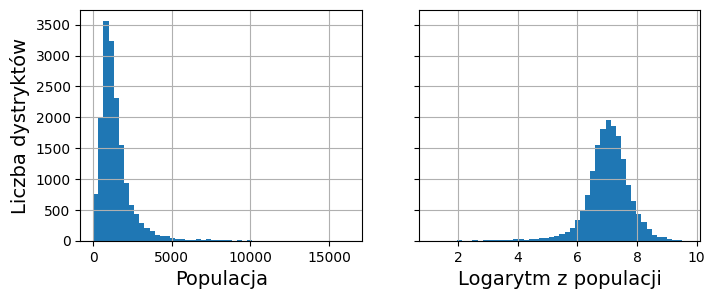

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
X_train["population"].hist(ax=axs[0], bins=50)
X_train["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Populacja")
axs[1].set_xlabel("Logarytm z populacji")
axs[0].set_ylabel("Liczba dystryktów")
plt.show()

Na rysunku powyżej widać, że cecha ta wygląda znacznie lepiej po obliczeniu jej logarytmu: zaczyna bardzo przypominać rozkład Gaussa (dzwonowy).

Inną metodą obsługi cech gruboogonowych jest **kubełkowanie (ang. bucketizing lub binning)** cechy. Oznacza
to podział rozkładu na zbliżonych rozmiarów przedziały i zastąpienie wartości każdej cechy indeksem przedziału, do którego ta wartość należy, podobnie jak robiliśmy to podczas tworzenia cechy
income_cat (mimo że użyliśmy jej wyłącznie w próbkowaniu warstwowym). Mógłbyś na przykład
zastąpić każdą wartość jej percentylem.

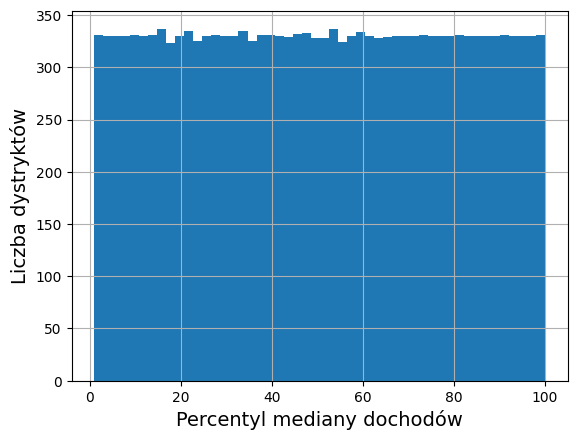

In [67]:
# dodatkowy kod – pokazuje jedynie, że uzyskujemy rozkład jednostajny
percentiles = [np.percentile(X_train["median_income"], p)
               for p in range(1, 100)]
X_train["median_income_percentile"] = pd.cut(X_train["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
X_train["median_income_percentile"] = X_train["median_income_percentile"].astype(int)
X_train["median_income_percentile"].hist(bins=50)
plt.xlabel("Percentyl mediany dochodów")
plt.ylabel("Liczba dystryktów")
plt.show()
# Uwaga: dochody poniżej 1. percentyla są oznaczone jako 1, a dochody powyżej
# 99. percentyla są oznaczone jako 100. Właśnie dlatego zakres rozkładu wynosi
# od 1 do 100 (a nie od 0 do 100).

Kubełkowanie przy użyciu ppercentyli skutkuje uzyskaniem cechy o rozkładzie niemal jednostajnym, dlatego nie trzeba jej dalej skalować; ewentualnie możemy podzielić ją przez liczbę przedziałów, aby wymusić wartości w przedziale od 0 do 1.

Po zastosowaniu metody `cut` zazwyczaj otrzymujemy zmienną kategorialną. Jenak w naszym przypadku to percentyle, dlatego przekonwertowaliśmy tą zmienną do zmiennej numerycznej (konkretnie do liczb całkowitych `astype(int)`).

Kubełkowanie przy użyciu przedziałów o równej szerokości
skutkuje uzyskaniem cechy o rozkładzie niemal jednostajnym, dlatego nie trzeba jej dalej skalować; ewentualnie możemy podzielić ją przez liczbę przedziałów, aby wymusić wartości w przedziale od 0 do 1.

In [68]:
# Usuńmy zmienną, gdyż nie będziemy jej używać
X_train.drop("median_income_percentile", axis=1, inplace=True)

W przypadku cechy o rozkładzie wielomodalnym (czyli takiej, której rozkład ma co najmniej dwa wyraźne szczyty, zwane modami), na przykład *housing_median_age*:

<Axes: >

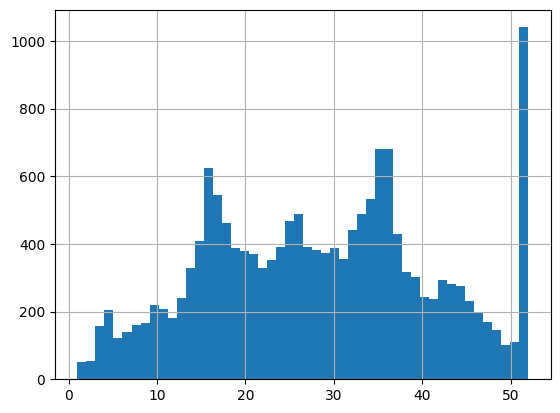

In [69]:
X_train["housing_median_age"].hist(bins=50)

przydatne może być jej kubełkowanie, jednak w tym przypadku identyfikatory przedziałów będą traktowane jako kategorie, a nie wartości numeryczne. Oznacza to, że należy zakodować indeksy przedziałów, na przykład za pomocą klasy *OneHotEncoder*. Rozwiązanie to umożliwi modelowi regresyjnemu łatwiej odkrywać różne reguły dla poszczególnych zakresów danej wartości cechy. Na przykład być może domy zbudowane jakieś 35 lat temu miały niecodzienny kształt, odstający od ówczesnych trendów, dlatego są tańsze, niż wskazywałby na to ich wiek.

Kolejnym sposobem przekształcania rozkładów wielomodalnych jest dodawanie cechy dla każdej
z modalnych (przynajmniej głównych), tak by odzwierciedlić podobieństwo między medianą wieku domów a danym modem. Wskaźnik podobieństwa jest zazwyczaj obliczany za pomocą **radialnej funkcji
bazowej (ang. radial basis function — RBF)**, czyli dowolnej funkcji, która zależy wyłącznie od odległości
między wartością wejściową a stałym punktem. Najczęściej stosowaną radialną funkcją bazową jest gaussowska RBF, której wartość wynikowa maleje wykładniczo w miarę oddalania się wartości wejściowej
od ustalonego punktu. Na przykład podobieństwo obliczone gaussowską RBF między wiekiem
domu x a 35 jest uzyskiwane wzorem $\exp(−\gamma(x−35)^2)$. Hiperparametr $\gamma$ (gamma) określa szybkość rozkładu wskaźnika podobieństwa w miarę oddalania się x od wartości 35. Za pomocą funkcji `rbf_kernel()`
z biblioteki Scikit-Learn możemy stworzyć nową cechę gaussowskiej RBF, mierzącą podobieństwo
między medianą wieku domów a wartością 35:

In [70]:
from sklearn.metrics.pairwise import rbf_kernel

# Tworzymy 2 wersje funkcji RBF z różnymi wartościami gamma
X_train["age_simil_35_v1"] = rbf_kernel(X_train[["housing_median_age"]], [[35]], gamma=0.1)
X_train["age_simil_35_v2"] = rbf_kernel(X_train[["housing_median_age"]], [[35]], gamma=0.03)

Sporządźmy wykres dla zilustrowania nowych zmiennych

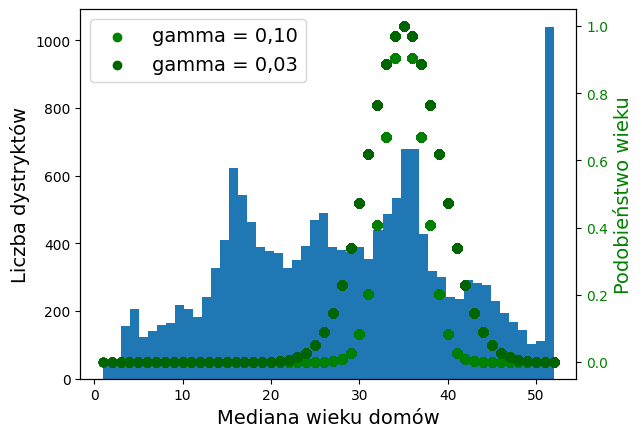

In [71]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Mediana wieku domów")
ax1.set_ylabel("Liczba dystryktów")
ax1.hist(X_train["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
ax2.scatter(X_train["housing_median_age"], X_train["age_simil_35_v1"], color="green", label="gamma = 0,10")
ax2.scatter(X_train["housing_median_age"], X_train["age_simil_35_v2"], color="darkgreen", label="gamma = 0,03")
ax2.tick_params(axis='y', labelcolor="green")
ax2.set_ylabel("Podobieństwo wieku", color="green")
plt.legend(loc="upper left")
plt.show()

Zgodnie z wykresem nowa cecha podobieństwa wieku ma szczytową wartość w punkcie 35, czyli w okolicach maksimum rozkładu mediany wieku domów: jeżeli ta konkretna grupa wiekowa jest dobrze skorelowana z niższymi cenami, to istnieje spore prawdopodobieństwo, że ta cecha okaże się przydatna. Widać także, jak wyglądałaby ta cecha po użyciu mniejszej wartości gamma.

In [72]:
# Usuńmy zmienne podobieństwa gdyż na razie nie są nam potrzebne
X_train.drop(["age_simil_35_v1", "age_simil_35_v2"], axis=1, inplace=True)

Do tej pory przyglądaliśmy się jedynie cechom wejściowym, ale czasami może być konieczne także
przekształcanie cech docelowych. Na przykład jeśli rozkład cechy docelowej jest gruboogonowy,
być może zechcemy zastąpić ją jej logarytmem. Jeśli jednak to zrobimy, model regresyjny będzie teraz
przewidywał logarytm mediany wartości domu, a nie samą medianę wartości domu. Będziemy musieli
obliczyć wykładnik przewidywań modelu, aby otrzymać przewidywaną medianę wartości domu.

Na szczęście większość transformatorów Scikit-Learn zawiera metodę `inverse_transform()`, dzięki
czemu obliczenie odwrotności przekształceń staje się łatwe. Na przykład poniższy kod prezentuje mechanizm skalowania etykiet za pomocą klasy StandardScaler (tak samo, jak robiliśmy
to w przypadku danych wejściowych), a następnie wytrenowania prostego modelu regresji liniowej na przeskalowanych etykietach oraz użycia go do uzyskania przewidywań na podstawie
nowych danych, które następnie przekształcamy z powrotem do pierwotnej skali za pomocą metody inverse_transform() wytrenowanej klasy skalującej. Zwróćmy uwagę, że przekształcamy etykiety
z obiektu Series w DataFrame, ponieważ klasa *StandardScaler* oczekuje danych dwuwymiarowych.
Poza tym dla uproszczenia trenujemy w tym przykładzie model jedynie na pojedynczej, nieprzetworzonej cesze wejściowej (medianie dochodów):

In [73]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(y_train.to_frame())

model = LinearRegression()
model.fit(X_train[["median_income"]], scaled_labels)
some_new_data = X_train[["median_income"]].iloc[:5]  # udajemy, że są to nowe dane

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [74]:
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

Rozwiązanie to sprawdza się dobrze, ale prościej jest skorzystać z klasy `TransformedTargetRegressor`.
Musimy ją tylko skonstruować, podając model regresyjny i transformator etykiet, a następnie dopasowując ją do zestawu uczącego przy użyciu pierwotnych, nieskalowanych etykiet. Automatycznie wykorzysta transformator do skalowania etykiet i wytrenuje model regresji na otrzymanych skalowanych etykietach, tak samo jak robiliśmy to wcześniej. Następnie, gdy będziemy chcieli uzyskać przewidywania, wywoła metodę *predict()* modelu regresji i wykorzysta metodę *inverse_transform()* klasy skalującej w celu uzyskania predykcji:

In [75]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(X_train[["median_income"]], y_train)
predictions = model.predict(some_new_data)

In [76]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

## Niestandardowe transformatory

Mimo że moduł Scikit-Learn zawiera wiele przydatnych funkcji przekształcających, często jesteśmy
zmuszeni pisać własne transformatory wykonujące operacje niestandardowych przekształceń, oczyszczania danych lub łączenia określonych atrybutów.

W przypadku przekształceń niewymagających żadnego treningu wystarczy napisać funkcję przyjmującą
na wejściu tablicę NumPy i dającą na wyjściu przekształconą tablicę. Na przykład, jak już wiemy
z poprzedniego punktu, często warto jest przekształcać cechy o rozkładach gruboogonowych, zastępując je ich logarytmem (przy założeniu, że rozkład jest prawostronnie gruboogonowy, a cecha ma wartości dodatnie). Stwórzmy transformator logarytmiczny i zastosujmy go wobec cechy *population*:

In [77]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(X_train[["population"]])

In [78]:
log_pop

,population
13096,7.362645
14973,6.501290
3785,6.331502
14689,7.520235
20507,7.555905
...,...
14207,6.843750
13105,7.257708
19301,7.942362
19121,7.452982


Argument `inverse_func` jest nieobowiązkowy. Pozwala określić funkcję odwrotnego przekształcenia, na przykład jeżeli zamierzasz użyć transformatora w klasie *TransformedTargetRegressor*.

Funkcja przekształcająca może przyjmować hiperparametry jako dodatkowe argumenty. Na przykład możemy stworzyć transformator obliczający ten sam wskaźnik podobieństwa (gaussowską RBF) jak wcześniej:

In [79]:
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(X_train[["housing_median_age"]])

In [80]:
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

Zauważmy, że nie ma funkcji odwrotnej dla jądra RBF, ponieważ zawsze istnieją dwie wartości w danej
odległości od ustalonego punktu (z wyjątkiem odległości 0).

Metoda *rbf_kernel()* nie traktuje cech osobno. Jeżeli przekażemy jej tablicę zawierającą dwie cechy, zmierzy dwuwymiarową (euklidesową) odległość w celu określenia podobieństwa. Na przykład w poniższy sposób dodajemy cechę mierzącą podobieństwo geograficzne między każdym dystryktem a San Francisco:

In [81]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])
sf_simil

array([[0.99566482],
       [0.99567518],
       [0.99655196],
       ...,
       [0.6599801 ],
       [0.6752005 ],
       [0.67616077]])

Transformatory niestandardowe przydają się także do łączenia cech. Na przykład poniżej widać
klasę *FunctionTransformer* obliczającą proporcje między cechami wejściowymi 0 i 1

In [82]:
sample_array = np.array([[1., 2.], [3., 4.]])
sample_array

array([[1., 2.],
       [3., 4.]])

In [83]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(sample_array)

array([[0.5 ],
       [0.75]])

Klasa *FunctionTransformer* jest bardzo przydatna, ale co w przypadku, gdybyśmy chcieli, aby można
było trenować transformator, który uczyłby się pewnych parametrów w metodzie *fit()* , po czym
wykorzystywał je później w metodzie *transform()* ? W tym celu musimy napisać niestandardową
klasę. Moduł Scikit-Learn polega na technice inferencji typów (ang. duck typing), dlatego klasa ta nie musi
dziedziczyć z jakiejś konkretnej klasy bazowej. Wystarczą jej trzy metody: *fit()* (zwracająca wartość
obiektu *self* ), *transform()* oraz *fit_transform()* .*
Tę ostatnią metodę możemy uzyskać „za darmo”, dodając bazową klasę *TransformerMixin* : domyślna
implementacja będzie wywoływać jedynie metodę *fit()* , a następnie *transform()* . Jeśli dołączymy
klasę bazową *BaseEstimator* (i unikamy zmiennych **args* oraz ***kwargs* w konstruktorze), uzyskamy także
dostęp do dwóch dodatkowych metod ( *get_params()* i *set_params()* ). Przydadzą się one do automatycznego strojenia hiperparametrów.

Poniższy kod przedstawia niestandardowy transformator zachowujący się w dużej mierze jak klasa *StandardScaler*:

In [84]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # żadnych zmiennych *args ani **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y jest wymagana, mimo że jej nie używamy
        X = check_array(X)  # sprawdza, czy X jest tablicą ze skończonymi wartościami zmiennoprzecinkowymi
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # każdy estymator przechowuje to w metodzie fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # wyszukuje poznane atrybuty (ze znacznikiem _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

Kilka uwag:
- Pakiet sklearn.utils.validation zawiera kilka funkcji, za pomocą których możemy walidować
dane wejściowe. Kod używany w środowisku produkcyjnym powinien je zawierać.
- Potoki Scikit-Learn wymagają, aby metoda *fit()* zawierała dwa argumenty, X i y , dlatego potrzebujemy argumentu `y=None` , mimo że nie używamy y .
- Wszystkie estymatory Scikit-Learn wyznaczają `n_features_in_` wewnątrz metody *fit()* i sprawiają, że dane przekazywane do metod transform() lub predict() zawierają właśnie taką liczbę cech.
- Metoda *fit()* musi zwracać parametr *self* .
- Implementacja ta nie jest stuprocentowo pełna: wszystkie estymatory powinny wyznaczyć
*feature_names_in_* w metodzie *fit()* , gdy jest im przekazywany obiekt DataFrame . Ponadto
wszystkie transformatory powinny dostarczać metody *get_feature_names_out()* oraz *inverse_transform()* , gdy można odwrócić dane przekształcenie.

Niestandardowy transformator może (i często korzysta z tej możliwości) wykorzystywać w implementacji inne estymatory. Na przykład poniższy listing ukazuje niestandardowy transformator wykorzystujący klasę KMeans w metodzie *fit()* do wykrywania głównych skupień w danych, a następnie
wprowadzający metodę *rbf_kernel()* do metody *transform()* , co pozwala zmierzyć podobieństwo
każdej próbki do środka skupienia:

In [85]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Podobieństwo {i} skupienia" for i in range(self.n_clusters)]

Algorytm centroidów jest algorytmem analizy skupień wyszukującym
zgrupowania danych. Ich liczba jest określana za pomocą hiperparametru *n_clusters* . Po zakończeniu treningu środki skupień są dostępne w atrybucie *cluster_centers_* . Metoda *fit()* klasy
*KMeans* zawiera dodatkowy argument *sample_weight* , pozwalający użytkownikowi wyznaczać względne
wagi próbek. Algorytm centroidów jest stochastyczny, co oznacza, że do wyszukiwania skupień wykorzystywana jest losowość, dlatego jeżeli chcemy otrzymywać odtwarzalne wyniki, musimy wyznaczyć
parametr *random_state* . Jak widać, kod jest całkiem prosty mimo złożoności zadania. Skorzystajmy
teraz z niestandardowego transformatora:

In [86]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(
    X_train[["latitude", "longitude"]],
    sample_weight=y_train
)

Powyższy listing tworzy transformator *ClusterSimilarity* , wyznaczający dziesięć skupień. Następnie wywołuje metodę *fit_transform()* wraz ze współrzędnymi geograficznymi (szerokością i długością) każdego dystryktu ze zbioru uczącego; waga każdego dystryktu jest określona na podstawie
jego mediany wartości domu. Transformator wykorzystuje algorytm centroidów do wykrywania
skupień, a następnie mierzy podobieństwo metodą gaussowskiej RBF pomiędzy każdym dystryktem
a wszystkimi dziesięcioma środkami skupień. W konsekwencji powstaje macierz zawierająca po
jednym wierszu na każdy dystrykt i po jednej kolumnie na każde skupienie. Przyjrzyjmy się trzem
pierwszym wierszom i zaokrąglijmy wartości do dwóch miejsc po przecinku:

In [87]:
similarities[:3].round(2)

array([[0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.13, 0.55, 0.  , 0.56],
       [0.64, 0.  , 0.11, 0.04, 0.  , 0.  , 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.65, 0.  , 0.  , 0.01, 0.  , 0.49, 0.59, 0.  , 0.28]])

Zilustrujmy to na wykresie:

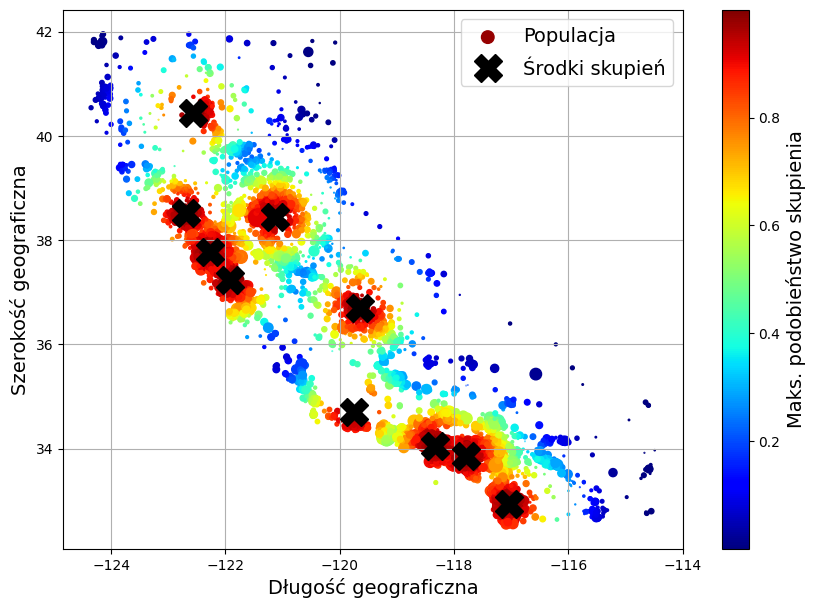

In [88]:
X_train_renamed = X_train.rename(columns={
    "latitude": "Szerokość geograficzna", "longitude": "Długość geograficzna",
    "population": "Populacja",
    "median_house_value": "Mediana wartości domu (ᴜsᴅ)"})
X_train_renamed["Maks. podobieństwo skupienia"] = similarities.max(axis=1)

X_train_renamed.plot(kind="scatter", x="Długość geograficzna", y="Szerokość geograficzna", grid=True,
                     s=X_train_renamed["Populacja"] / 100, label="Populacja",
                     c="Maks. podobieństwo skupienia",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Środki skupień")
plt.legend(loc="upper right")
plt.show()

Rysunek powyżej ukazuje środki dziesięciu skupień wyznaczonych przez algorytm centroidów. Dystrykty są pokolorowane zgodnie z ich podobieństwem geograficznym do najbliższego środka skupienia. Jak widać, większość skupień mieści się w gęsto zaludnionych i bogatych obszarach.

## Potoki transformujące

Praca ze zbiorami danych wiąże się z przeprowadzaniem wielu operacji we właściwej kolejności. Na szczęście biblioteka Scikit-learn posiada klasę `Pipeline` pomagającą zbudować odpowiednią sekwencję transformacji. Zbudujmy teraz potok wstępnie przetwarzający atrybuty numeryczne:

In [89]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

Konstruktor Pipeline przyjmuje listę par (2-elementowych krotek) postaci *(nazwa, estymator)* definiującą sekwencję operacji.
Nazwy mogą być dowolne, pod warunkiem że są niepowtarzalne i nie zawierają podwójnego znaku
podkreślenia (__). Przydadzą się one później podczas strojenia hiperparametrów. Wszystkie estymatory
oprócz ostatniego (który może być dowolnym elementem: transformatorem, predyktorem czy jakimkolwiek innym estymatorem) muszą być funkcjami przekształcającymi (tj. muszą zawierać metodę
*fit_transform()* ).

> Jeżeli w notatniku Jupyter uruchomimy `sklearn.set_config(display="diagram")`, to wszystkie estymatory Scikit-Learn będą wyświetlane w postaci interaktywnych diagramów.

In [90]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

Jeżeli nie chcemy nazywać transformatorów, możemy użyć funkcji `make_pipeline()` ; przyjmuje ona
argumenty jako argumenty pozycyjne i tworzy obiekt Pipeline przy użyciu nazw klas transformatorów, małymi literami i bez podkreśleń (np. "simpleimputer" ). Jeżeli wiele transformatorów ma taką samą nazwę, na jej końcu zostaje dodany indeks (np. "foo-1", "foo-2" itd.).

In [91]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

Potok posiada te same metody co ostatni estymator. W tym przykładzie ostatnią funkcją prognostyczną
jest StandardScaler , będąca w istocie transformatorem, dlatego potok również zachowuje się jak
transformator. Jeżeli wywołasz metodę *transform()* potoku, będzie ona sekwencyjnie realizować
wszystkie przekształcenia wobec danych. Gdyby ostatni estymator był predyktorem, to cały potok miałby
metodę *predict()* , a nie *transform()* . Jej wywołanie spowodowałoby sekwencyjne zastosowanie
wszystkich przekształceń wobec danych, a wynik zostałby przesłany do metody *predict()* predyktora.

Zastosujmy *num_pipeline* do danych numerycznych, odzyskajmy DataFrame wykorzystując metodę *get_feature_names_out()* i przy pomocy metody *describe()* sprawdźmy czy wszystkie transformacje zostały zastosowane:

In [92]:
X_train_num_prepared = num_pipeline.fit_transform(X_train_num)
X_train_num_prepared_df = pd.DataFrame(
    X_train_num_prepared,
    columns = num_pipeline.get_feature_names_out(),
    index = X_train_num.index
)
X_train_num_prepared_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-4.837216e-15,-2.580838e-15,-1.473843e-17,-5.916886e-17,1.039220e-16,4.765783e-17,1.463085e-17,7.611267e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.387765e+00,-1.447452e+00,-2.191210e+00,-1.206927e+00,-1.272777e+00,-1.299382e+00,-1.303343e+00,-1.781577e+00
25%,-1.113124e+00,-8.005453e-01,-8.404335e-01,-5.456668e-01,-5.710538e-01,-5.832443e-01,-5.772176e-01,-6.913383e-01
50%,5.314128e-01,-6.458502e-01,3.359809e-02,-2.354008e-01,-2.462699e-01,-2.361370e-01,-2.402747e-01,-1.754490e-01
75%,7.813423e-01,9.761041e-01,6.692575e-01,2.354897e-01,2.468327e-01,2.744761e-01,2.690575e-01,4.649198e-01
max,2.540847e+00,2.959014e+00,1.861119e+00,1.678576e+01,1.344681e+01,1.359152e+01,1.268893e+01,5.882868e+00


Widać, że nie ma wartości brakujących oraz, że wszystkie średnie i odchylenia standardowe wynoszą odpowiednio 0 i 1, a więc potok działa.

Potoki obsługują indeksowanie:

In [93]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [94]:
num_pipeline[1]

StandardScaler()

In [95]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [96]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

In [97]:
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

Do tej pory zajmowaliśmy się oddzielnie kolumnami kategorialnymi i numerycznymi. Byłoby wygodniej, gdybyśmy dysponowali pojedynczym transformatorem przetwarzającym wszystkie kolumny i dobierającym odpowiednie przekształcenia do poszczególnych typów kolumn. W tym celu możemy użyć
klasy `ColumnTransformer` . Na przykład w poniższym listingu jest stosowana *num_pipeline* (zdefiniowana
przed chwilą) do atrybutów numerycznych, a *cat_pipeline* do atrybutu kategorialnego:

In [98]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])

Klasa *ColumnTransformer* wymaga listy 3-elementowych krotek,
gdzie każda krotka zawiera nazwę (niepowtarzalną i pozbawioną podwójnych znaków podkreślenia), transformator, a także listę nazw (lub indeksów) kolumn, wobec których powinien zostać użyty transformator.

> Zamiast korzystać z transformatora, możemy wyznaczyć łańcuch znaków *"drop"* , jeżeli
chcemy, aby kolumny zostały usunięte, lub *"passthrough"* , jeśli mają pozostać niezmienione. Domyślnie pozostałe kolumny (te, które nie zostały wymienione na liście) zostaną usunięte, ale możemy wyznaczyć hiperparametr remainder w dowolnym transformatorze (lub łańcuchu znaków "passthrough" ), jeśli chcemy, aby były one przetwarzane inaczej.

Tworzenie listy nazw kolumn nie jest zbyt wygodne, dlatego moduł Scikit-Learn zawiera funkcję
`make_column_selector()` zwracającą funkcję selektora, której możemy użyć do automatycznego wyboru
wszystkich cech danego typu, na przykład numerycznych lub kategorialnych. Możemy przekazać tę
funkcję selektora do *ColumnTransformer* zamiast nazw lub indeksów. Ponadto jeśli nie mamy ochoty
nadawać nazw transformatorom, możemy użyć metody `make_column_transformer()` , wyznaczającej
samodzielnie nazwy, podobnie jak metoda *make_pipeline()* . Na przykład poniższy listing tworzy
taką samą klasę *ColumnTransformer* jak wcześniej, z tym że transformatory zostają tu automatycznie
nazwane "pipeline-1" i "pipeline-2" zamiast "num" i "cat"

In [99]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)
preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ce4033b7ec0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ce4033b6780>)])

Teraz możemy użyć klasy *ColumnTransformer* na naszym treningowym zestawie danych:

In [100]:
X_train_prepared = preprocessing.fit_transform(X_train)

Jednak powyższy zbiór nie zawiera wszystkich operacji, które chcieliśmy wykonać. Podsumujmy jakie przekształcenia omawialiśmy wcześniej. Chcemy teraz stworzyć pojedynczy potok, który będzie realizował wszystkie omówione do tej pory
przekształcenia.:
- Brakujące wartości w cechach numerycznych będą zastępowane ich medianą, gdyż większość algorytmów uczenia maszynowego nie spodziewa się brakujących danych. W cechach kategorialnych brakujące wartości będą zastępowane najczęściej występującą
kategorią.
- Cecha kategorialna będzie kodowana „gorącojedynkowo”, gdyż większość algorytmów uczenia
maszynowego akceptuje na wejściu wyłącznie dane numeryczne.
- Zostanie obliczonych i dołączonych kilka cech współczynnikowych: współczynnik_sypialni
( bedrooms_ratio ), pokoje_na_rodzinę ( room_per_house ) i liczba_osób_na_dom ( people_per_house ).
Mamy nadzieję, że będą lepiej skorelowane z medianą wartości domu, a więc pomogą modelom uczenia maszynowego.
- Zostanie dodanych także kilka cech podobieństwa skupień. Prawdopodobnie okażą się one
bardziej przydatne od współrzędnych geograficznych.
- Cechy długoogonowe zostaną zastąpione ich logarytmami, gdyż większość modeli preferuje
cechy o rozkładach mniej więcej jednostajnym lub Gaussa.
- Wszystkie cechy numeryczne będą standaryzowane, gdyż większość algorytmów uczenia maszynowego preferuje cechy o mniej więcej takiej samej skali.

Kod potoku realizującego powyższe założenia powinien wyglądać już znajomo:

In [101]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # nazwy cech

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("współczynnik_sypialni", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("pokoje_na_rodzinę", ratio_pipeline(), ["total_rooms", "households"]),
        ("liczba_osób_na_dom", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # pozostaje jedna kolumna: housing_median_age

Jeżeli uruchomimy tę klasę *ColumnTransformer*, to wykona ona wszystkie przekształcenia i wyświetli tablicę
NumPy zawierającą 24 cechy:

In [102]:
X_train_prepared = preprocessing.fit_transform(X_train)
X_train_prepared.shape

(16512, 24)

In [103]:
preprocessing.get_feature_names_out()

array(['współczynnik_sypialni__ratio', 'pokoje_na_rodzinę__ratio',
       'liczba_osób_na_dom__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Podobieństwo 0 skupienia',
       'geo__Podobieństwo 1 skupienia', 'geo__Podobieństwo 2 skupienia',
       'geo__Podobieństwo 3 skupienia', 'geo__Podobieństwo 4 skupienia',
       'geo__Podobieństwo 5 skupienia', 'geo__Podobieństwo 6 skupienia',
       'geo__Podobieństwo 7 skupienia', 'geo__Podobieństwo 8 skupienia',
       'geo__Podobieństwo 9 skupienia', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

Możemy także odzyskać wyjściowy DataFrame z naszego finalnego potoku transformującego:

In [104]:
X_train_prepared_df = pd.DataFrame(
    X_train_prepared,
    columns = preprocessing.get_feature_names_out(),
    index = X_train.index
)
X_train_prepared_df

,współczynnik_sypialni__ratio,pokoje_na_rodzinę__ratio,liczba_osób_na_dom__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,geo__Podobieństwo 0 skupienia,geo__Podobieństwo 1 skupienia,...,geo__Podobieństwo 6 skupienia,geo__Podobieństwo 7 skupienia,geo__Podobieństwo 8 skupienia,geo__Podobieństwo 9 skupienia,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__housing_median_age
13096,1.846624,-0.866027,-0.330204,1.324114,0.637892,0.456906,1.310369,-1.071522,4.581829e-01,1.241847e-14,...,8.489216e-04,9.770322e-01,2.382191e-08,3.819126e-18,0.0,0.0,0.0,1.0,0.0,1.861119
14973,-0.508121,0.024550,-0.253616,-0.252671,-0.063576,-0.711654,-0.142030,1.194712,6.511495e-10,9.579596e-01,...,5.614049e-27,1.260964e-13,1.103491e-01,3.547610e-01,1.0,0.0,0.0,0.0,0.0,0.907630
3785,-0.202155,-0.041193,-0.051041,-0.925266,-0.859927,-0.941997,-0.913030,-0.756981,3.432506e-01,4.261141e-15,...,5.641131e-03,7.303265e-01,2.508224e-08,2.669659e-18,0.0,1.0,0.0,0.0,0.0,0.351428
14689,-0.149006,-0.034858,-0.141475,0.952773,0.943475,0.670700,0.925373,-0.912253,2.244844e-15,2.704823e-01,...,5.913326e-35,5.201263e-20,1.712982e-03,8.874598e-01,0.0,1.0,0.0,0.0,0.0,-0.919891
20507,0.963208,-0.666554,-0.306148,1.437622,1.003590,0.719093,1.481464,0.034537,1.090228e-11,9.422206e-01,...,5.421817e-30,1.048030e-15,2.568824e-02,5.279506e-01,0.0,0.0,0.0,0.0,1.0,0.589800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,0.804368,-0.452111,-0.269780,0.465581,0.109720,-0.247054,0.379471,0.648953,1.115293e-10,9.505920e-01,...,1.878046e-28,1.651285e-14,4.776856e-02,3.463930e-01,1.0,0.0,0.0,0.0,0.0,0.987087
13105,-0.192328,0.036792,-0.073741,0.454022,0.477277,0.314542,0.402773,-0.637675,1.409886e-03,1.430917e-03,...,7.663746e-14,9.538119e-06,4.530237e-01,9.507766e-05,0.0,1.0,0.0,0.0,0.0,-0.443146
19301,-0.242492,-0.109987,0.158542,0.824206,0.859552,1.243381,0.889897,0.333540,8.098794e-20,3.501819e-02,...,1.715187e-42,5.158970e-25,5.966953e-06,1.346576e-01,0.0,0.0,0.0,0.0,1.0,-1.237721
19121,0.259775,-0.360937,-0.210332,0.987851,0.811293,0.579462,1.023329,0.377051,4.385614e-10,9.667073e-01,...,2.464809e-27,8.018690e-14,8.956217e-02,3.478114e-01,1.0,0.0,0.0,0.0,0.0,0.669257


# Wybierz i wytrenuj model

## Trening i ocena na zbiorze uczącym

Super! Przetworzyliśmy nasz zbiór. W końcu możemy zacząć modelowanie! Zaczniewy od wytrenowania prostego modelu regresji liniowej:

In [105]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X=X_train_prepared_df, y=y_train)

LinearRegression()

Stworzyliśmy model regresji liniowej. Teraz możemy wygenerować predykcje na zbiorze treningowym.

In [106]:
X_train_predictions = lin_reg.predict(X_train_prepared_df)


Porównajmy 5 pierwszych predykcji z rzeczywistymi wartościami:

In [107]:
print(X_train_predictions[:5].round(-2))
print(y_train.iloc[:5].values)

[246000. 372700. 135700.  91400. 330900.]
[458300. 483800. 101700.  96100. 361800.]


Model działa, ale nie w każdym przypadku: pierwsza prognoza jest mylna (o ponad 200 000 dolarów!),
natomiast pozostałe są nieco lepsze.

Aby ocenić model zawsze trzeba wybrać jakąś miarę/metrykę wydajności, my wybierzemy *pierwiastek błędu średniokwadratowego (RMSE)*:

$$RMSE(y,\hat{y})=\sqrt{\frac{1}{m}\sum_{i=1}^m(y-\hat{y})^2}.$$

Aby wyznaczyć RMSE w Scikit-learn wykorzystamy funkcję `root_mean_squared_error()`:

In [108]:
from sklearn.metrics import root_mean_squared_error

lin_rmse = root_mean_squared_error(y_true = y_train, y_pred = X_train_predictions)
lin_rmse

68972.88910758484

A więc model myli się średnio o około 68 972 dolary. Czy to dużo? Przyjrzyjmy się rozkładowi zmiennej docelowej:

<Axes: >

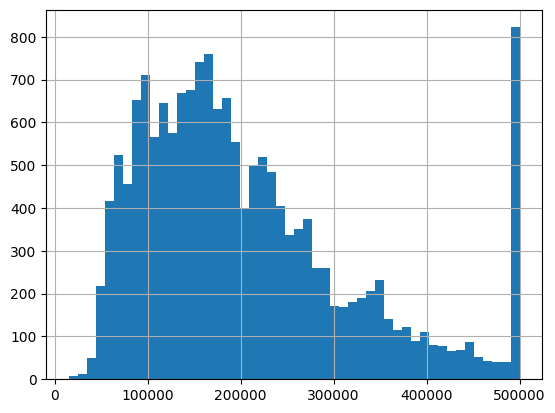

In [109]:
y_train.hist(bins=50)

Patrząc na powyższy wykres widzimy, że to dość dużo. Widzimy tu klasyczny przykład niedotrenowania modelu wobec danych uczących. Taka sytuacja oznacza, że cechy nie
dostarczają odpowiedniej ilości informacji pozwalających na uzyskanie dobrych prognoz albo że model
nie jest wystarczająco dobry. Jak wiemy z poprzedniego rozdziału, podstawowymi sposobami radzenia
sobie z problemem niedotrenowania są wybór potężniejszego algorytmu, wprowadzenie lepszych
cech lub zmniejszenie ograniczeń modelu. Nasz model nie jest regularyzowany, dlatego odpada ostatnia
możliwość. Możemy spróbować dodać więcej cech, najpierw jednak chcesz sprawdzić bardziej skomplikowany model i zobaczyć, jak sobie poradzi.

Wyprubujmy model `DecisionTreeRegressor`, gdyż jest to całkiem zaawansowany model potrafiący wyszukiwać w danych skomplikowane, nieliniowe zależności:

In [112]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X=X_train_prepared_df, y=y_train)

DecisionTreeRegressor(random_state=42)

Po wyuczeniu modelu sprawdzamy jego wydajność wobec zbioru uczącego:

In [113]:
X_train_predictions = tree_reg.predict(X_train_prepared_df)
tree_rmse = root_mean_squared_error(y_true=y_train, y_pred=X_train_predictions)
tree_rmse

0.0

Błąd wynosi 0. To chyba dobrze...Znaleźliśmy model idealny? Oczywiście jest o wiele bardziej prawdopodobne, że model po prostu został znacznie przetrenowany.
Widzimy, że zbiór treningowy nie za bardzo nadaje się do oceny wydajności modelu. Powinniśmy przetestować nasz zbiór na zbiorze testowym, a jeszcze lepiej dokonać kroswalidacji (sprawdzianu krzyżowego).

## Lepsza ocena za pomocą sprawdzianu krzyżowego

Jednym ze sposobów oceniania modelu drzewa decyzyjnego byłoby wykorzystanie funkcji *train_test_split()* do rozdzielenia zestawu uczącego na podzbiory trenujący i walidacyjny, następnie
wyuczenie naszego modelu przy użyciu tego zbioru trenującego, po czym ewaluacja za pomocą zbioru
walidacyjnego. Proces ten oznacza dodatkowy wysiłek, ale nie jest zbyt skomplikowany i całkiem dobrze
spełnia swoje zadanie.

Doskonałą alternatywą jest użycie funkcji **k-krotnego sprawdzianu krzyżowego (kroswalidacji,
ang. k-fold cross-validation)**. Za pomocą poniższego kodu zbiór uczący zostaje losowo rozdzielony na
10 nienakładających się podzbiorów (ang. *folds*), następnie przeprowadzane jest dziesięciokrotne trenowanie i ocenianie modelu drzewa decyzyjnego (za każdym razem zostaje wybrany inny podzbiór
do oceny wydajności modelu, a dziewięć pozostałych do uczenia). W konsekwencji uzyskujemy
tablicę zawierającą 10 wyników ewaluacji:

In [114]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(
    estimator = tree_reg,
    X = X_train_prepared_df,
    y = y_train,
    scoring = "neg_root_mean_squared_error",
    cv = 10
)
tree_rmses

array([68111.04600529, 63467.80938601, 63627.40376336, 66551.083619  ,
       61615.02376863, 64618.11762235, 64885.24197354, 69247.62296406,
       70344.23216025, 65912.49154673])

> Funkcja sprawdzianu krzyżowego będąca częścią modułu Scikit-Learn oczekuje
funkcji użyteczności (im większa wartość, tym lepiej), a nie funkcji kosztu (im mniejsza
wartość, tym lepiej), dlatego funkcja zliczająca wynik stanowi w rzeczywistości przeciwieństwo błędu RMSE. Ma ujemną wartość, dlatego musimy zmienić znak rezultatu,
aby otrzymać wyniki RMSE.

Spójrzmy na statystyki błędów drzewa decyzyjnego przy użyciu metody *describe()*:

In [115]:
pd.Series(tree_rmses).describe()

,0
count,10.000000
mean,65838.007281
std,2755.728595
min,61615.023769
25%,63875.082228
50%,65398.866760
75%,67721.055409
max,70344.232160


Model drzewa decyzyjnego nie wygląda teraz już tak dobrze. W rzeczywistości wygląda na to, że sprawuje się niemal tak kiepsko jak model regresji liniowej! Zwróćmy uwagę, że za pomocą sprawdzianu
krzyżowego możemy nie tylko oszacować wydajność naszego modelu, lecz także zmierzyć precyzję oszacowań (tj. odchylenie standardowe). RMSE drzewa decyzyjnego wynosi w przybliżeniu 66 149
z odchyleniem standardowym rzędu ok. 2506. Nie uzyskalibyśmy takich informacji, gdybyśmy skorzystali wyłącznie z jednego zbioru walidacyjnego. Jednak ceną kroswalidacji jest konieczność kilkukrotnego uczenia modelu, dlatego rozwiązanie to nie zawsze jest możliwe.

Jeżeli obliczymy ten sam wskaźnik dla modelu regresji liniowej:

In [116]:
lin_rmses = -cross_val_score(
    estimator = lin_reg,
    X = X_train_prepared_df,
    y = y_train,
    scoring = "neg_root_mean_squared_error",
    cv = 10
)
pd.Series(lin_rmses).describe()

,0
count,10.000000
mean,70204.936656
std,4027.076706
min,66092.699714
25%,68354.701381
50%,69010.765589
75%,70087.047198
max,80822.013715


okaże się, że średni RMSE wynosi
70 205, a odchylenie standardowe to 4 027. Model drzewa decyzyjnego zdaje się zatem radzić sobie
nieznacznie lepiej od modelu liniowego, ale różnica jest minimalna z powodu sporego przetrenowania.
Wiemy, że występuje tu problem z przetrenowaniem, ponieważ błąd uczenia jest niewielki (a w zasadzie
równy 0), natomiast błąd walidacji jest duży.

Sprawdźmy jeszcze jeden model: `RandomForestRegressor`. Mechanizm
działania modeli losowego lasu polega na uczeniu wielu drzew decyzyjnych za pomocą różnych podzbiorów cech, po czym następuje uśrednienie otrzymanych prognoz. Takie modele składające się
z wielu innych modeli nazywane są **zespołami (ang. ensemble)**: są one w stanie poprawić skuteczność modelu podstawowego (w tym przypadku drzewa decyzyjnego).

**Ostrzeżenie:** poniższa komórka może być przetwarzana przez kilka minut:

In [120]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_rmses = -cross_val_score(
    estimator = forest_reg,
    X = X_train_prepared_df,
    y = y_train,
    scoring = "neg_root_mean_squared_error",
    cv = 10
)
forest_rmses

array([46661.94872   , 47157.30834035, 45639.27622219, 46215.3755056 ,
       46474.67174169, 47479.40776752, 47371.26449265, 49383.31625004,
       47317.18696418, 47248.53560326])

Policzmy statystyki błędu walidacji dla lasu losowego:

In [121]:
pd.Series(forest_rmses).describe()

,0
count,10.000000
mean,47094.829161
std,1000.139793
min,45639.276222
25%,46521.490986
50%,47202.921972
75%,47357.745111
max,49383.316250


Aby mieć komplet wyników, porównajmy jeszcze RMSE zmierzony za pomocą sprawdzianu krzyżowego ("błąd walidacji") z RMSE zmierzonym na zbiorze uczącym ("błąd uczenia"). W tym celu musimy policzyć RMSE na zbiorze uczącym (tak jak wyżej)

In [122]:
forest_reg.fit(X = X_train_prepared_df, y = y_train)
X_train_predictions = forest_reg.predict(X_train_prepared_df)
forest_rmse = root_mean_squared_error(y_true = y_train, y_pred = X_train_predictions)
forest_rmse

17551.2122500877

Teraz jest znacznie lepiej! Błąd walidacji dla lasu losowego wynosi 47 175 z odchyleniem standardowym 997 co jest znacznie lepszym wynikiem niż dla regresji liniowej i drzewa decyzyjnego. Błąd uczenia dla lasu losowego wynosi 17 520. Nie jest to już 0 (jak dla drzewa decyzyjnego), ale wciąż błąd uczenia dla lasu losowego  jest znacznie mniejszy od błędu walidacji, co oznacza przetrenowanie na zbiorze uczącym. Możliwymi
rozwiązaniami są uproszczenie modelu, jego ograniczenie (np. regularyzacja) lub pozyskanie znacznie większej liczby danych uczących. Zanim jednak wybierzemy model losowego lasu, powinniśmy
wypróbować wiele innych modeli, reprezentujących różne rodzaje algorytmów uczenia maszynowego, bez
spędzania dużej ilości czasu na strojeniu hiperparametrów. Naszym celem jest stworzenie krótkiej listy
(od dwóch do pięciu pozycji) najbardziej obiecujących modeli.

# Dostrój swój model

Załóżmy, że mamy już sporządzoną listę obiecujących modeli. Musimy je teraz dostroić. Możemy tego dokonać na kilka sposobów.

## Przeszukiwanie siatki

Jednym z rozwiązań jest własnoręczne dobieranie wartości hiperparametrów, dopóki nie uzyskamy ich
znakomitej kombinacji. Jest to bardzo żmudne i czasochłonne zajęcie.

Zamiast tego możesz zlecić poszukiwania obiektowi GridSearchCV . Wystarczy podać interesujące nas
hiperparametry oraz ich proponowane wartości, a wszystkie kombinacje zostaną ocenione za pomocą
sprawdzianu krzyżowego. Na przykład poniższy kod poszukuje najlepszej kombinacji wartości hiperparametrów dla modelu RandomForestRegressor.

**Ostrzeżenie:** poniższa komórka może być przetwarzana przez kilka minut:

In [123]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(X=X_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('współczynnik_sypialni',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ce4034aaf30>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

Zwróćmy uwagę, że możemy się odnosić do dowolnego hiperparametru dowolnego estymatora w potoku,
nawet jeśli estymator ten jest zagnieżdżony głęboko wewnątrz kilku potoków i transformatorów
kolumnowych. Na przykład gdy moduł Scikit-Learn widzi "preprocessing__geo__n_clusters",
to podzieli ten łańcuch znaków w miejscach wyznaczonych przez podwójne znaki podkreślenia,
a następnie poszukuje estymatora o nazwie "preprocessing" w potoku oraz znajduje klasę wstępnego przetwarzania *ColumnTransformer*. Następnie poszukuje transformatora o nazwie "geo" wewnątrz tej klasy *ColumnTransformer* i znajduje transformator *ClusterSimilarity*, wykorzystany przez nas
w przypadku atrybutów współrzędnych geograficznych. Teraz znajduje hiperparametr *n_clusters*
tego transformatora.

Łącznie mechanizm przeszukiwania siatki sprawdzi zatem 9+6 = 15 kombinacji wartości
hiperparametrów, a każdy potok zostanie wytrenowany trzykrotnie na każdą kombinację, gdyż korzystamy z trzykrotnego sprawdzianu krzyżowego. Oznacza to, że będzie łącznie 15·3 = 45 rund uczenia, więc może to zająć trochę czasu.

Pełną listę hiperparametrów możliwych do strojenia możemy sprawdzić za pomocą metody `full_pipeline.get_params().keys()`:

In [124]:
print(str(full_pipeline.get_params().keys())[:1000] + "...")

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__force_int_remainder_cols', 'preprocessing__n_jobs', 'preprocessing__remainder__memory', 'preprocessing__remainder__steps', 'preprocessing__remainder__transform_input', 'preprocessing__remainder__verbose', 'preprocessing__remainder__simpleimputer', 'preprocessing__remainder__standardscaler', 'preprocessing__remainder__simpleimputer__add_indicator', 'preprocessing__remainder__simpleimputer__copy', 'preprocessing__remainder__simpleimputer__fill_value', 'preprocessing__remainder__simpleimputer__keep_empty_features', 'preprocessing__remainder__simpleimputer__missing_values', 'preprocessing__remainder__simpleimputer__strategy', 'preprocessing__remainder__standardscaler__copy', 'preprocessing__remainder__standardscaler__with_mean', 'preprocessing__remainder__standardscaler__with_std', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 

Wyszukana najlepsza kombinację hiperparametrów możemy uzyskać przy pomocy atrybutu `best_params_`:

In [125]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

Możemy również bezpośrednio uzyskać dostęp do najlepszego estymatora za pomocą atrybutu
`best_estimator_`:

In [126]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('współczynnik_sypialni',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_na...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ce403511790>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

Jeżeli obiekt *GridSearchCV* zostanie zainicjowany z parametrem `refit=True`
(jest to wartość domyślna), to po znalezieniu najlepszego estymatora za pomocą sprawdzianu krzyżowego ta funkcja oszacowująca będzie wykorzystana wobec całego zbioru uczącego. Zazwyczaj jest to dobre
rozwiązanie, ponieważ im więcej danych zostanie użytych, tym bardziej wzrośnie wydajność modelu.

Wyniki ewaluacji są dostępne za pomocą atrybutu `cv_results_` . Jest to słownik, więc dla większej czytelności lepiej umieścić
go w obiekcie DataFrame:

In [127]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,10.380929,0.051307,0.195387,0.007712,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-42725.423800,-43708.197434,-44334.935606,-43589.518946,662.417543,1
13,13.269617,0.020226,0.210462,0.011580,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-43486.175916,-43819.842374,-44899.968680,-44068.662323,603.399271,2
6,6.973491,0.326313,0.217984,0.020125,10,4,"{'preprocessing__geo__n_clusters': 10, 'random...",-43797.854175,-44036.240246,-44960.694004,-44264.929475,501.513170,3
9,9.813821,0.238596,0.198358,0.013188,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-43709.661050,-44163.463178,-44966.539107,-44279.887778,519.680433,4
7,9.745324,0.264023,0.229061,0.035256,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-43709.661050,-44163.463178,-44966.539107,-44279.887778,519.680433,4


Średni wynik testowy RMSE dla najlepszego modelu metodą przeszukiwania siatki wynosi 44 080, co stanowi lepszy wynik niż w przypadku standardowych wartości tych hiperparametrów (47 175). Gratulacje! Właśnie skutecznie dostroiliśmy nasz najlepszy model!

## Przeszukiwanie losowe

Mechanizm przeszukiwania siatki przydaje się wtedy, gdy chcemy sprawdzić względnie niewielką
liczbę kombinacji (tak jak w powyższym przykładzie), często jednak jest preferowana klasa `RandomizedSearchCV` , zwłaszcza w przypadku dużej przestrzeni przeszukiwania hiperparametrów. Klasa ta
jest używana w bardzo podobny sposób jak *GridSearchCV* , tutaj jednak nie są sprawdzane wszystkie
możliwe kombinacje, lecz następuje ewaluacja stałej liczby losowych kombinacji poprzez dobór losowej
wartości hiperparametru w każdym przebiegu. Może to być zaskakujące, ale takie rozwiązanie cechuje kilka zalet:
- Jeżeli niektóre hiperparametry są ciągłe (lub dyskretne, ale z dużą liczbą możliwych wartości)
i zezwolisz na, dajmy na to, 1000 przebiegów losowego przeszukiwania, zostanie sprawdzonych
1000 wartości dla każdego hiperparametru, podczas gdy w metodzie przeszukiwania siatki zostałoby
sprawdzonych jedynie kilka zdefiniowanych wartości.
- Załóżmy, że hiperparametr nie robi zbyt dużej różnicy, ale jeszcze o tym nie wiemy. Jeśli ma 10 możliwych wartości i dodamy je do przeszukiwania siatki, to uczenie zajmie dziesięciokrotnie więcej
czasu. Jeśli jednak dodamy je do przeszukiwania losowego, nie będzie to miało wpływu na czas
uczenia.
- Jeżeli istnieje sześć hiperparametrów do sprawdzenia, każdy zawierający 10 możliwych wartości, to w metodzie przeszukiwania siatki model musi być wytrenowany milion razy, natomiast
przeszukiwanie losowe można zawsze uruchomić z dowolnie wybraną liczbą iteracji.
W przypadku każdego hiperparametru musimy wprowadzić listę dostępnych wartości lub określić
rozkład prawdopodobieństwa.

Wypróbujmy 30 (`n_iter` × `cv`) losowych kombinacji hiperparametrów.

**Ostrzeżenie:** poniższa komórka może być przetwarzana przez kilka minut:

In [128]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(X=X_train, y=y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('współczynnik_sypialni',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(f...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce403330e60>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce403513260>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [129]:
# dodatkowy kod – wyświetla wyniki przeszukiwania losowego
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,16.388645,0.123637,0.226374,0.008819,45,9,"{'preprocessing__geo__n_clusters': 45, 'random...",-41341.655457,-42242.449878,-43056.683024,-42213.596120,700.454278,1
8,12.748484,0.062931,0.216368,0.007759,32,7,"{'preprocessing__geo__n_clusters': 32, 'random...",-41825.023754,-42275.119344,-43241.044537,-42447.062545,590.735171,2
0,28.062255,0.197009,0.197252,0.016102,41,16,"{'preprocessing__geo__n_clusters': 41, 'random...",-42238.113363,-42938.035062,-43353.747344,-42843.298590,460.355691,3
5,8.004169,0.341652,0.214960,0.014824,42,4,"{'preprocessing__geo__n_clusters': 42, 'random...",-41869.304323,-43362.130948,-43663.532455,-42964.989242,784.476385,4
2,13.912704,0.089443,0.220070,0.002088,23,8,"{'preprocessing__geo__n_clusters': 23, 'random...",-42490.231129,-42928.051069,-43718.249300,-43045.510499,508.169719,5


Średni wynik testowy RMSE dla najlepszego modelu metodą losowego przeszukiwania wynosi 42 103, co stanowi lepszy wynik niż w przypadku metody przeszukiwania siatki (44 080)! A zatem zdefiniujmy nasz najlepszy (finalny) model:

In [130]:
final_model = rnd_search.best_estimator_  # zawiera wstępne przetwarzanie danych
final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('współczynnik_sypialni',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_na...
                                                  ClusterSimilarity(n_clusters=45,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ce403b4bd70>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=9, random_state=42))])

W przypadku losowego przeszukiwania najczęściej będziemy korzystać z poniższych rozkładów dla hiperparametrów (zakładających jednakowe prawdopodobieństwo wylosowania):

* `scipy.stats.randint(a, b+1)`: dla hiperparametrów o wartościach dyskretnych w zakresie od a do b,
* `scipy.stats.uniform(a, b)`: bardzo podobna, ale dla hiperparametrów ciągłych,

ale można też korzystać z innych rozkładów takich jak: `scipy.stats.geom(1 / scale)`, `scipy.stats.expon(scale)`, `scipy.stats.reciprocal(a, b)` itp.


> Biblioteka Scikit-Learn zawiera również klasy przeszukiwania hiperparametrów `HalvingRandomSearchCV`
i `HalvingGridSearchCV` . Ich celem jest skuteczniejsze wykorzystanie zasobów obliczeniowych w kontekście szybszego trenowania lub eksplorowania większej przestrzeni hiperparametrów. Mechanizm ich działania przypomina fazę pucharową z rozgrywek sportowych: w pierwszej rundzie wszyscy kandydaci są trenowani na ograniczonych zasobach (czyli np. na małym podzbiorze danych) i do następnej rundy przechodzą najlepsi kandydaci. W kolejnych rundach zbiór treningowi jest stopniowo zwiększany, a lista kolejnych kandydatów do tytułu najlepszego modelu staje się stopniowo krótsza, aż do uzyskania zwycięzcy.

## Metody zespołowe

Innym sposobem strojenia modelu jest próba połączenia najlepiej spisujących się modeli. Grupa (lub
„zespół”) zawsze ma większą wydajność od jej elementów składowych (tak jak losowe lasy są skuteczniejsze od składających się na nie pojedynczych drzew decyzyjnych), zwłaszcza jeśli poszczególne modele popełniają odmienne rodzaje błędów. Przyjrzymy się temu zagadnieniu dokładniej w dalszej części kursu.

## Analizowanie najlepszych modeli i ich błędów

Często uzyskasz wiele informacji na temat problemu, sprawdzając najlepsze modele. Na przykład
model *RandomForestRegressor* może wskazywać względną istotność każdego atrybutu w generowaniu
dokładnych prognoz:

In [131]:
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.07, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.02, 0.01,
       0.01, 0.01, 0.  , 0.01, 0.02, 0.01, 0.02, 0.01, 0.  , 0.01, 0.02,
       0.01, 0.01, 0.01, 0.  , 0.02, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01,
       0.03, 0.01, 0.01, 0.01, 0.01, 0.04, 0.01, 0.02, 0.01, 0.02, 0.01,
       0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.07,
       0.  , 0.  , 0.  , 0.01])

Tyle, że nie wiadomo co tu jest czym!. Uszeregujmy teraz te wyniki istotności w kolejności malejącej i wyświetlmy je obok odpowiednich
nazw atrybutów:

In [132]:
sorted(
    zip(
        feature_importances,
        final_model["preprocessing"].get_feature_names_out()
    ),
    reverse=True
)

[(np.float64(0.18599734460509476), 'log__median_income'),
 (np.float64(0.07338850855844489), 'cat__ocean_proximity_INLAND'),
 (np.float64(0.06556941990883976), 'współczynnik_sypialni__ratio'),
 (np.float64(0.053648710076725316), 'pokoje_na_rodzinę__ratio'),
 (np.float64(0.04598870861894749), 'liczba_osób_na_dom__ratio'),
 (np.float64(0.04175269214442519), 'geo__Podobieństwo 30 skupienia'),
 (np.float64(0.025976797232869678), 'geo__Podobieństwo 25 skupienia'),
 (np.float64(0.023595895886342255), 'geo__Podobieństwo 36 skupienia'),
 (np.float64(0.02021056221732893), 'geo__Podobieństwo 9 skupienia'),
 (np.float64(0.01860691707666145), 'geo__Podobieństwo 34 skupienia'),
 (np.float64(0.018137988374628867), 'geo__Podobieństwo 37 skupienia'),
 (np.float64(0.01740435316632675), 'geo__Podobieństwo 18 skupienia'),
 (np.float64(0.016778386143844894), 'geo__Podobieństwo 1 skupienia'),
 (np.float64(0.015459009666188978), 'geo__Podobieństwo 7 skupienia'),
 (np.float64(0.015325731028175924), 'geo__Pod

Dzięki uzyskanym informacjom możemy zrezygnować z niektórych mniej przydatnych cech (przykładowo wygląda na to, że tylko kategoria *ocean_proximity_INLAND* jest użyteczna, dlatego warto spróbować usunąć pozostałe).

> Transformator `sklearn.feature_selection.SelectFromModel` może automatycznie
odrzucić najmniej użyteczne cechy: gdy dopasowujemy go, trenuje model (zazwyczaj
metodą lasu losowego), wyszukuje jego atrybut *feature_importances_* i wybiera najprzydatniejsze cechy. Następnie po wywołaniu metody *transform()* zostają porzucone pozostałe cechy.

Poza wynikami uzyskanymi z atrybutu *feature_importances_*, należy przyjrzeć się błędom popełnianym przez nasz model, a następnie postarać się poznać ich przyczynę oraz znaleźć rozwiązanie: dodać cechy lub usunąć nieprzydatne, pozbyć się elementów odstających itd.

Teraz jest również dobra okazja, aby sprawdzić, czy model działa poprawnie nie tylko ogólnie, lecz
również dla wszystkich kategorii dystryktów, wiejskich lub miejskich, ubogich lub bogatych, północnych lub południowych, zamieszkanych przez mniejszości itd. Tworzenie podzbiorów zbioru
walidacyjnego dla każdej kategorii wymaga poświęcenia odrobiny czasu, ale jest istotne: jeżeli nasz
model nie radzi sobie z całą kategorią dystryktów, to prawdopodobnie nie należy go wdrażać aż do
rozwiązania problemu, a przynajmniej nie należy używać do uzyskiwania przewidywań dla tej kategorii,
gdyż może to przynieść więcej szkody niż pożytku.

Jest to również dobry moment na konsultacje wszelkich wątpliwości z biznesem. Często biznes ma zupełnie inny punkt widzenia na różne sprawy niż Data Scientist, więc warto poznać tą opinię zanim pójdziemy w kierunku, który zupełnie zostanie odrzucony przez biznes.

## Oceń swój system na zbiorze testowym

Po etapie strojenia modeli w końcu uzyskaliśmy system sprawujący się wystarczająco dobrze. Załóżmy też, że jesteśmy już po kilku spotkaniach z biznesem i nasz model uzyskał wstępną aprobatę z ich strony. Przyszedł czas na ostateczny sprawdzian na zbiorze testowym:

In [ ]:
X_test = df_test.drop("median_house_value", axis=1)
y_test = df_test["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = root_mean_squared_error(y_true=y_test, y_pred=final_predictions)
print(final_rmse)

41445.533268606625


Testowe RMSE wynosi 41 422. Takie punktowe oszacowanie błędu uogólniania może się okazać niewystarcza-
jąco przekonujące: a jeżeli model jest zaledwie o 0,1% lepszy od obecnie używanego w środowisku
produkcyjnym? Chcemy się dowiedzieć, jak precyzyjne jest to oszacowanie. W tym celu możemy
obliczyć 95-procentowy **przedział ufności (ang. confidence interval) dla błędu uogólniania** za pomocą
funkcji `scipy.stats.t.interval()`:

In [ ]:
from scipy import stats

squared_errors = (final_predictions - y_test) ** 2
alpha = 0.05 # poziom istotności
np.sqrt(stats.t.interval(
        1 - alpha, # poziom ufności
        len(squared_errors) - 1, # liczba stopni swobody (df = n-1)
        loc=squared_errors.mean(), # średnia z kwadratów błędów
        scale=stats.sem(squared_errors) # błąd standaryzowany dla średniej (std/sqrt(df))
    )
)

array([39293.55594722, 43491.1590655 ])

Moglibyśmy obliczyć przedział ręcznie w następujący sposób korzystając ze wzoru:
$$\left(\overline{X}-t_{1-\frac{\alpha}{2},m-1}\cdot\frac{\hat{S}}{\sqrt{m}}, \overline{X}+t_{1-\frac{\alpha}{2},m-1}\cdot\frac{\hat{S}}{\sqrt{m}}\right)$$

In [ ]:
m = len(squared_errors)
mean = squared_errors.mean() # średnia z kwadratów błędów
tscore = stats.t.ppf(1 - alpha / 2, df = m - 1) # kwantyl rozkładu t-Studenta dla poziomu istotności = alpha i df = m-1 stopni swobody. ppf to funkcja odwrotna do dystrybuanty.
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m) # Używamy argumentu ddof=1, aby policzyć estymator odchylenia standardowego z próby
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(np.float64(39293.555947221386), np.float64(43491.15906550365))

Tak na prawdę, ponieważ zbiór testowy jest duży powinniśmy wykorzystać kwantyl standardowego rozkładu normalnego *u* zamiast kwantyla rozkładu t-Studenta *t*
$$\left(\overline{X}-u_{1-\frac{\alpha}{2},m-1}\cdot\frac{\hat{S}}{\sqrt{m}}, \overline{X}+u_{1-\frac{\alpha}{2},m-1}\cdot\frac{\hat{S}}{\sqrt{m}}\right)$$
w sposób ręczny:

In [ ]:
uscore = stats.norm.ppf(1 - alpha / 2)
umargin = uscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - umargin), np.sqrt(mean + umargin)

(np.float64(39294.204352038214), np.float64(43490.573233502204))

lub korzystając z gotowej funkcji `stats.norm.interval`:

In [ ]:
np.sqrt(stats.norm.interval(
        1 - alpha, # poziom ufności
        # len(squared_errors) - 1, # liczba stopni swobody (df = n-1)
        loc=squared_errors.mean(), # średnia z kwadratów błędów
        scale=stats.sem(squared_errors) # błąd standaryzowany dla średniej (std/sqrt(df))
    )
)

array([39294.20435204, 43490.5732335 ])

Uzyskujemy dość duży przedział w zakresie od 39 273 do 43 465,
a nasze wcześniejsze oszacowanie punktowe o wartości 41 422 znajduje się mniej więcej pośrodku tego
przedziału, co jest dobrym wynikiem.

W przypadku intensywnego strojenia hiperparametrów będziemy zazwyczaj otrzymywać nieco gorsze
wyniki niż zmierzone za pomocą sprawdzianu krzyżowego. Wynika to z faktu, że system zostaje
dostrojony do danych walidacyjnych i prawdopodobnie nie będzie sobie tak dobrze radził z nieznanymi
próbkami. Akurat tak się nie dzieje w naszym przykładzie, ponieważ testowy RMSE jest mniejszy od walidacyjnego RMSE, ale jeśli nam się to przytrafi, musimy powstrzymać chęć dalszego poprawiania
hiperparametrów w celu uzyskania dobrych wyników dla zbioru testowego; wszelkie usprawnienia
już raczej nie poprawią procesu uogólniania wobec nowych danych.

Teraz następuje faza przeduruchomieniowa projektu: musimy przedstawić rozwiązanie (zwracając
szczególną uwagę na to, czego się nauczyliśmy, co zadziałało, a co nie, jakie przyjęliśmy założenia, a także
zaznaczając ograniczenia systemu), wszystko udokumentować i stworzyć eleganckie prezentacje
zawierające wyraźne wizualizacje wyników oraz łatwe do zapamiętania stwierdzenia (np. „mediana do-
chodów stanowi główny predyktor cen mieszkań”).

## Zapisanie stanu modelu za pomocą narzędzia joblib

Znakomicie! Otrzymaliśmy pozwolenie na uruchomienie systemu! Musimy teraz przygotować nasze
rozwiązanie do warunków produkcyjnych (tzn. dopracować kod, napisać dokumentację oraz testy itd.).
Następnym etapem jest wdrożenie modelu do środowiska produkcyjnego. Najprostszym sposobem
jest po prostu zapisanie najlepszego wytrenowanego modelu, przesłanie pliku do środowiska produkcyjnego i jego wczytanie.

Do zapisania modelu możemy użyć biblioteki *joblib* w następujący sposób:

In [ ]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

Teraz możesz wdrożyć ten model do produkcji. Na przykład poniższy kod mógłby być skryptem uruchamianym w środowisku produkcyjnym (oczywiście musimy odtworzyć w środowisku produkcyjnym wszelkie niestandardowe klasy i funkcje używane przez model):

In [ ]:
import joblib

# dodatkowy kod – pominięty dla zachowania zwięzłości
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = X_train.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [ ]:
predictions

array([441046.12, 454713.09, 104832.  , 101316.  , 336181.05])

Móglibyśmy skorzystać również z modułu pickle, ale joblib jest skuteczniejszy.

Gratulacje! Jeśli dobrnąłeś do końca tego notebooka to już teraz posiadłeś sporą wiedzę na temat uczenia maszynowego. :)